In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv('C:/Users/Tusha/OneDrive/Desktop/GL - DSE/capstone/Vehicle/train.csv')
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [54]:
df.shape

(233154, 41)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [56]:
dfc = df.copy()

In [57]:
#Data Transform

In [58]:
dfc['AVERAGE.ACCT.AGE'].head()

0     0yrs 0mon
1    1yrs 11mon
2     0yrs 0mon
3     0yrs 8mon
4     0yrs 0mon
Name: AVERAGE.ACCT.AGE, dtype: object

In [59]:
dfc[['AVERAGE_ACCT_Year','AVERAGE_ACCT_Month']] = dfc['AVERAGE.ACCT.AGE'].str.split("yrs",expand=True)
dfc[['AVERAGE_ACCT_Month','AVERAGE_ACCT_newMonth']] = dfc['AVERAGE_ACCT_Month'].str.split("mon",expand=True)
dfc["AVERAGE.ACCT.AGE"]= dfc["AVERAGE_ACCT_Year"].astype(str).astype(int)+((dfc["AVERAGE_ACCT_Month"].astype(str).astype(int))/12)
dfc = dfc.drop(columns= ["AVERAGE_ACCT_Year","AVERAGE_ACCT_Month",'AVERAGE_ACCT_newMonth'])

In [60]:
dfc['AVERAGE.ACCT.AGE'] = round(dfc['AVERAGE.ACCT.AGE'],2)

In [61]:
dfc['AVERAGE.ACCT.AGE'].head()

0    0.00
1    1.92
2    0.00
3    0.67
4    0.00
Name: AVERAGE.ACCT.AGE, dtype: float64

In [62]:
dfc[['CREDIT_HISTORY_LENGTH_Year','CREDIT_HISTORY_LENGTH_Month']] = dfc['CREDIT.HISTORY.LENGTH'].str.split("yrs",expand=True)
dfc[['CREDIT_HISTORY_LENGTH_Month','CREDIT_HISTORY_LENGTH_Month1']] = dfc['CREDIT_HISTORY_LENGTH_Month'].str.split("mon",expand=True)
dfc["CREDIT.HISTORY.LENGTH"]= dfc["CREDIT_HISTORY_LENGTH_Year"].astype(str).astype(int)+((dfc["CREDIT_HISTORY_LENGTH_Month"].astype(str).astype(int))/12)
dfc = dfc.drop(columns= ["CREDIT_HISTORY_LENGTH_Year","CREDIT_HISTORY_LENGTH_Month",'CREDIT_HISTORY_LENGTH_Month1'])


In [63]:
dfc['CREDIT.HISTORY.LENGTH'] = round(dfc['CREDIT.HISTORY.LENGTH'],2)

In [64]:
dfc['CREDIT.HISTORY.LENGTH'].head()

0    0.00
1    1.92
2    0.00
3    1.25
4    0.00
Name: CREDIT.HISTORY.LENGTH, dtype: float64

In [65]:
#data type conversion

In [66]:
dfc['Passport_flag'] = dfc['Passport_flag'].astype('object')
dfc['MobileNo_Avl_Flag'] = dfc['MobileNo_Avl_Flag'].astype('object')
dfc['Aadhar_flag'] = dfc['Aadhar_flag'].astype('object')
dfc['PAN_flag'] = dfc['PAN_flag'].astype('object')
dfc['VoterID_flag'] = dfc['VoterID_flag'].astype('object')
dfc['Driving_flag'] = dfc['Driving_flag'].astype('object')

In [67]:
# change PERFORM_CNS.SCORE.DESCRIPTION with its frequency

In [68]:
k = dfc['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts().index
v = dfc['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts().values
dt = {}
dt.update(zip(k,v)) 
dt

{'No Bureau History Available': 116950,
 'C-Very Low Risk': 16045,
 'A-Very Low Risk': 14124,
 'D-Very Low Risk': 11358,
 'B-Very Low Risk': 9201,
 'M-Very High Risk': 8776,
 'F-Low Risk': 8485,
 'K-High Risk': 8277,
 'H-Medium Risk': 6855,
 'E-Low Risk': 5821,
 'I-Medium Risk': 5557,
 'G-Low Risk': 3988,
 'Not Scored: Sufficient History Not Available': 3765,
 'J-High Risk': 3748,
 'Not Scored: Not Enough Info available on the customer': 3672,
 'Not Scored: No Activity seen on the customer (Inactive)': 2885,
 'Not Scored: No Updates available in last 36 months': 1534,
 'L-Very High Risk': 1134,
 'Not Scored: Only a Guarantor': 976,
 'Not Scored: More than 50 active Accounts found': 3}

In [69]:
dfc['PERFORM_CNS.SCORE.DESCRIPTION'] = dfc['PERFORM_CNS.SCORE.DESCRIPTION'].map(dt)

In [70]:
# Bin PERFORM_CNS.SCORE with 6 categories and later use label encoding to encode it

In [71]:
dfc['PERFORM_CNS.SCORE'].head()

0      0
1    598
2      0
3    305
4      0
Name: PERFORM_CNS.SCORE, dtype: int64

In [73]:
dfc['PERFORM_CNS.SCORE'] = dfc['PERFORM_CNS.SCORE'].apply(lambda x: 'Risky' if (x>= 0) & (x <= 300) else 'Low' if (x>= 301) & (x <= 600) else 'Fair' if (x>= 601) & (x <= 700) else 'Good' if (x>= 701) & (x <= 760) else 'Better' if (x>= 761) & (x <= 800) else 'Exgood')

In [75]:
dfc['PERFORM_CNS.SCORE'].value_counts().index

Index(['Risky', 'Good', 'Fair', 'Low', 'Exgood', 'Better'], dtype='object')

In [76]:
dt1 = {}
k1 = dfc['PERFORM_CNS.SCORE'].value_counts().index
v1 = [0,3,2,1,5,4]
dt1.update(zip(k1,v1))
dt1

{'Risky': 0, 'Good': 3, 'Fair': 2, 'Low': 1, 'Exgood': 5, 'Better': 4}

In [77]:
dfc['PERFORM_CNS.SCORE'] = dfc['PERFORM_CNS.SCORE'].map(dt1)

In [78]:
dfc['PERFORM_CNS.SCORE'].value_counts()

0    138561
3     28252
2     24300
1     18716
5     14373
4      8952
Name: PERFORM_CNS.SCORE, dtype: int64

In [80]:
print(dfc.shape)

(233154, 41)


In [79]:
# Drop Unnecessary columns

In [81]:
dfc = dfc.drop(['UniqueID','branch_id','supplier_id', 'manufacturer_id', 'Current_pincode_ID','State_ID','Employee_code_ID','Date.of.Birth','DisbursalDate'],axis = 1)

In [82]:
print(dfc.shape)

(233154, 32)


In [84]:
dfc['PERFORM_CNS.SCORE'] = dfc['PERFORM_CNS.SCORE'].astype('object')

In [85]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 32 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   disbursed_amount                     233154 non-null  int64  
 1   asset_cost                           233154 non-null  int64  
 2   ltv                                  233154 non-null  float64
 3   Employment.Type                      225493 non-null  object 
 4   MobileNo_Avl_Flag                    233154 non-null  object 
 5   Aadhar_flag                          233154 non-null  object 
 6   PAN_flag                             233154 non-null  object 
 7   VoterID_flag                         233154 non-null  object 
 8   Driving_flag                         233154 non-null  object 
 9   Passport_flag                        233154 non-null  object 
 10  PERFORM_CNS.SCORE                    233154 non-null  object 
 11  PERFORM_CNS.S

In [86]:
#using DFS (Deep Feature Synthesis)

In [87]:
import featuretools as ft

In [88]:
es = ft.EntitySet(id = 'Loan_Prediction')
es

Entityset: Loan_Prediction
  Entities:
  Relationships:
    No relationships

In [89]:
features = dfc.drop('loan_default', axis = 1)
y = dfc['loan_default']

In [90]:
es.entity_from_dataframe(entity_id = 'data_1', dataframe = features, make_index = True, index = 'Index')

Entityset: Loan_Prediction
  Entities:
    data_1 [Rows: 233154, Columns: 32]
  Relationships:
    No relationships

In [92]:
feature_matrix, feature_defs = ft.dfs(entityset = es, target_entity = 'data_1', max_depth = 1, 
                                     trans_primitives = ['add_numeric', 'multiply_numeric'])

In [93]:
feature_matrix.head()

,disbursed_amount,asset_cost,ltv,Employment.Type,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,...,ltv * PRI.OVERDUE.ACCTS,ltv * PRI.SANCTIONED.AMOUNT,ltv * PRIMARY.INSTAL.AMT,ltv * SEC.ACTIVE.ACCTS,ltv * SEC.CURRENT.BALANCE,ltv * SEC.DISBURSED.AMOUNT,ltv * SEC.INSTAL.AMT,ltv * SEC.NO.OF.ACCTS,ltv * SEC.OVERDUE.ACCTS,ltv * SEC.SANCTIONED.AMOUNT
Index,,,,,,,,,,,,,,,,,,,,,
0,50578,58400,89.55,Salaried,1,1,0,0,0,0,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,47145,65550,73.23,Self employed,1,1,0,0,0,0,...,73.23,3676146.0,145800.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,53278,61360,89.63,Self employed,1,1,0,0,0,0,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,57513,66113,88.48,Self employed,1,1,0,0,0,0,...,0.00,0.0,2742.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,52378,60300,88.39,Self employed,1,1,0,0,0,0,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
feature_defs

[<Feature: disbursed_amount>,
 <Feature: asset_cost>,
 <Feature: ltv>,
 <Feature: Employment.Type>,
 <Feature: MobileNo_Avl_Flag>,
 <Feature: Aadhar_flag>,
 <Feature: PAN_flag>,
 <Feature: VoterID_flag>,
 <Feature: Driving_flag>,
 <Feature: Passport_flag>,
 <Feature: PERFORM_CNS.SCORE>,
 <Feature: PERFORM_CNS.SCORE.DESCRIPTION>,
 <Feature: PRI.NO.OF.ACCTS>,
 <Feature: PRI.ACTIVE.ACCTS>,
 <Feature: PRI.OVERDUE.ACCTS>,
 <Feature: PRI.CURRENT.BALANCE>,
 <Feature: PRI.SANCTIONED.AMOUNT>,
 <Feature: PRI.DISBURSED.AMOUNT>,
 <Feature: SEC.NO.OF.ACCTS>,
 <Feature: SEC.ACTIVE.ACCTS>,
 <Feature: SEC.OVERDUE.ACCTS>,
 <Feature: SEC.CURRENT.BALANCE>,
 <Feature: SEC.SANCTIONED.AMOUNT>,
 <Feature: SEC.DISBURSED.AMOUNT>,
 <Feature: PRIMARY.INSTAL.AMT>,
 <Feature: SEC.INSTAL.AMT>,
 <Feature: NEW.ACCTS.IN.LAST.SIX.MONTHS>,
 <Feature: DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS>,
 <Feature: AVERAGE.ACCT.AGE>,
 <Feature: CREDIT.HISTORY.LENGTH>,
 <Feature: NO.OF_INQUIRIES>,
 <Feature: AVERAGE.ACCT.AGE + CREDIT.HIS

In [95]:
feature_matrix.shape

(233154, 537)

In [96]:
# 505 new features are created

In [97]:
dfc.shape

(233154, 32)

In [101]:
# changing Employment.Type column

In [102]:
dfc['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

In [104]:
temp = pd.get_dummies(dfc['Employment.Type'])
temp.head()

,Salaried,Self employed
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [106]:
dfc[['Salaried', 'Self employed']] = temp[['Salaried', 'Self employed']]

In [107]:
dfc.drop('Employment.Type', axis = 1, inplace = True)

In [108]:
print(dfc.shape)

(233154, 33)


In [150]:
#PRI.NO.OF.ACCTS 

In [145]:
dfc['PRI.NO.OF.ACCTS'].value_counts(normalize = True)[0:10]

0    0.501600
1    0.150021
2    0.084854
3    0.055821
4    0.039986
5    0.030975
6    0.023834
7    0.018919
8    0.015312
9    0.012370
Name: PRI.NO.OF.ACCTS, dtype: float64

In [146]:
dfc['PRI.NO.OF.ACCTS'].value_counts(normalize = True)[0:10].sum()

0.9336918946275852

In [134]:
len(dfc['PRI.NO.OF.ACCTS'].value_counts(normalize = True).index)

108

In [144]:
# we can see top 10 values contributes to ~93% unique values

In [147]:
dt2 = {}
k2 = dfc['PRI.NO.OF.ACCTS'].value_counts().index
v2 = dfc['PRI.NO.OF.ACCTS'].value_counts().values
dt2.update(zip(k2,v2))
dt2

{0: 116950,
 1: 34978,
 2: 19784,
 3: 13015,
 4: 9323,
 5: 7222,
 6: 5557,
 7: 4411,
 8: 3570,
 9: 2884,
 10: 2358,
 11: 1919,
 12: 1567,
 13: 1401,
 14: 1132,
 15: 941,
 16: 798,
 17: 652,
 18: 573,
 19: 503,
 20: 436,
 21: 347,
 22: 323,
 24: 286,
 23: 250,
 25: 187,
 26: 170,
 27: 153,
 28: 141,
 29: 130,
 30: 124,
 31: 111,
 32: 83,
 35: 73,
 34: 70,
 33: 67,
 37: 53,
 38: 53,
 36: 49,
 40: 41,
 39: 34,
 43: 32,
 41: 31,
 42: 25,
 45: 24,
 47: 23,
 46: 20,
 51: 17,
 44: 17,
 50: 16,
 49: 14,
 48: 14,
 54: 12,
 53: 11,
 60: 10,
 56: 10,
 57: 9,
 52: 9,
 59: 9,
 63: 7,
 61: 7,
 55: 7,
 58: 7,
 68: 6,
 72: 6,
 62: 5,
 64: 5,
 65: 5,
 78: 5,
 71: 4,
 74: 4,
 67: 4,
 66: 4,
 69: 3,
 93: 3,
 91: 3,
 76: 3,
 77: 3,
 87: 3,
 108: 2,
 94: 2,
 90: 2,
 84: 2,
 82: 2,
 81: 2,
 148: 2,
 73: 2,
 70: 2,
 354: 1,
 131: 1,
 104: 1,
 132: 1,
 102: 1,
 100: 1,
 113: 1,
 114: 1,
 99: 1,
 86: 1,
 136: 1,
 88: 1,
 453: 1,
 271: 1,
 85: 1,
 83: 1,
 147: 1,
 120: 1,
 194: 1,
 124: 1}

In [148]:
dfc['PRI.CURRENT.BALANCE.COUNT'] = dfc['PRI.NO.OF.ACCTS'].map(dt2)

In [149]:
dfc.head()

,disbursed_amount,asset_cost,ltv,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,...,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Salaried,Self employed,PRI.CURRENT.BALANCE.COUNT
0,50578,58400,89.55,1,1,0,0,0,0,0,...,0,0,0,0.00,0.00,0,0,1,0,116950
1,47145,65550,73.23,1,1,0,0,0,0,1,...,0,0,1,1.92,1.92,0,1,0,1,34978
2,53278,61360,89.63,1,1,0,0,0,0,0,...,0,0,0,0.00,0.00,0,0,0,1,116950
3,57513,66113,88.48,1,1,0,0,0,0,1,...,0,0,0,0.67,1.25,1,1,0,1,13015
4,52378,60300,88.39,1,1,0,0,0,0,0,...,0,0,0,0.00,0.00,1,1,0,1,116950


In [151]:
dfc.to_csv('dfc_wip.csv')

In [2]:
import pandas as pd

In [4]:
dfc = pd.read_csv('C:/Users/Tusha/OneDrive/Desktop/GL - DSE/capstone/Model Improvement/Model improvement wip/dfc_wip.csv')
dfc.head()

,Unnamed: 0,disbursed_amount,asset_cost,ltv,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,...,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Salaried,Self employed,PRI.CURRENT.BALANCE.COUNT
0,0,50578,58400,89.55,1,1,0,0,0,0,...,0,0,0,0.00,0.00,0,0,1,0,116950
1,1,47145,65550,73.23,1,1,0,0,0,0,...,0,0,1,1.92,1.92,0,1,0,1,34978
2,2,53278,61360,89.63,1,1,0,0,0,0,...,0,0,0,0.00,0.00,0,0,0,1,116950
3,3,57513,66113,88.48,1,1,0,0,0,0,...,0,0,0,0.67,1.25,1,1,0,1,13015
4,4,52378,60300,88.39,1,1,0,0,0,0,...,0,0,0,0.00,0.00,1,1,0,1,116950


In [5]:
dfc.drop('Unnamed: 0',axis = 1, inplace = True)

In [6]:
dfc.shape

(233154, 34)

In [7]:
#PRI.ACTIVE.ACCTS

In [8]:
dfc['PRI.ACTIVE.ACCTS'].value_counts()

0      137016
1       42055
2       21549
3       12268
4        7460
5        4542
6        2788
7        1795
8        1202
9         756
10        515
11        330
12        229
13        177
14        120
15         96
17         54
16         53
18         33
19         27
20         13
22         10
23         10
24         10
21          9
25          7
26          6
28          5
27          3
31          2
32          2
34          2
35          2
37          2
52          1
144         1
39          1
42          1
43          1
65          1
Name: PRI.ACTIVE.ACCTS, dtype: int64

In [9]:
dt3 = {}
k3 = dfc['PRI.ACTIVE.ACCTS'].value_counts().index
v3 = dfc['PRI.ACTIVE.ACCTS'].value_counts().values
dt3.update(zip(k3,v3))
dt3

{0: 137016,
 1: 42055,
 2: 21549,
 3: 12268,
 4: 7460,
 5: 4542,
 6: 2788,
 7: 1795,
 8: 1202,
 9: 756,
 10: 515,
 11: 330,
 12: 229,
 13: 177,
 14: 120,
 15: 96,
 17: 54,
 16: 53,
 18: 33,
 19: 27,
 20: 13,
 22: 10,
 23: 10,
 24: 10,
 21: 9,
 25: 7,
 26: 6,
 28: 5,
 27: 3,
 31: 2,
 32: 2,
 34: 2,
 35: 2,
 37: 2,
 52: 1,
 144: 1,
 39: 1,
 42: 1,
 43: 1,
 65: 1}

In [10]:
dfc['PRI.ACTIVE.ACCTS.COUNT'] = dfc['PRI.ACTIVE.ACCTS'].map(dt3)

In [11]:
#PRI.OVERDUE.ACCTS

In [12]:
dfc['PRI.OVERDUE.ACCTS'].value_counts()

0     206879
1      19970
2       4302
3       1202
4        404
5        166
6         96
7         38
8         27
9         25
11        12
12         8
10         6
13         5
14         5
17         2
18         2
23         1
15         1
16         1
19         1
25         1
Name: PRI.OVERDUE.ACCTS, dtype: int64

In [13]:
dt4 = {}
k4 = dfc['PRI.OVERDUE.ACCTS'].value_counts().index
v4 = dfc['PRI.OVERDUE.ACCTS'].value_counts().values
dt4.update(zip(k4,v4))
dt4

{0: 206879,
 1: 19970,
 2: 4302,
 3: 1202,
 4: 404,
 5: 166,
 6: 96,
 7: 38,
 8: 27,
 9: 25,
 11: 12,
 12: 8,
 10: 6,
 13: 5,
 14: 5,
 17: 2,
 18: 2,
 23: 1,
 15: 1,
 16: 1,
 19: 1,
 25: 1}

In [14]:
dfc['PRI.OVERDUE.ACCTS.COUNT'] = dfc['PRI.OVERDUE.ACCTS'].map(dt4)

In [15]:
dfc.shape

(233154, 36)

In [16]:
dfc.head()

,disbursed_amount,asset_cost,ltv,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,...,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Salaried,Self employed,PRI.CURRENT.BALANCE.COUNT,PRI.ACTIVE.ACCTS.COUNT,PRI.OVERDUE.ACCTS.COUNT
0,50578,58400,89.55,1,1,0,0,0,0,0,...,0,0.00,0.00,0,0,1,0,116950,137016,206879
1,47145,65550,73.23,1,1,0,0,0,0,1,...,1,1.92,1.92,0,1,0,1,34978,42055,19970
2,53278,61360,89.63,1,1,0,0,0,0,0,...,0,0.00,0.00,0,0,0,1,116950,137016,206879
3,57513,66113,88.48,1,1,0,0,0,0,1,...,0,0.67,1.25,1,1,0,1,13015,137016,206879
4,52378,60300,88.39,1,1,0,0,0,0,0,...,0,0.00,0.00,1,1,0,1,116950,137016,206879


In [17]:
#SEC.NO.OF.ACCTS

In [18]:
dfc['SEC.NO.OF.ACCTS'].value_counts()

0     227289
1       3466
2       1036
3        444
4        292
5        148
6        119
7         75
8         68
9         38
10        35
11        29
13        17
12        13
16        11
14        11
15        10
18         6
19         6
17         5
20         4
22         4
23         4
31         4
21         3
46         2
24         2
38         2
30         2
34         2
37         1
42         1
28         1
35         1
29         1
25         1
52         1
Name: SEC.NO.OF.ACCTS, dtype: int64

In [19]:
dt5 = {}
k5 = dfc['SEC.NO.OF.ACCTS'].value_counts().index
v5 = dfc['SEC.NO.OF.ACCTS'].value_counts().values
dt5.update(zip(k5,v5))
dt5

{0: 227289,
 1: 3466,
 2: 1036,
 3: 444,
 4: 292,
 5: 148,
 6: 119,
 7: 75,
 8: 68,
 9: 38,
 10: 35,
 11: 29,
 13: 17,
 12: 13,
 16: 11,
 14: 11,
 15: 10,
 18: 6,
 19: 6,
 17: 5,
 20: 4,
 22: 4,
 23: 4,
 31: 4,
 21: 3,
 46: 2,
 24: 2,
 38: 2,
 30: 2,
 34: 2,
 37: 1,
 42: 1,
 28: 1,
 35: 1,
 29: 1,
 25: 1,
 52: 1}

In [20]:
dfc['SEC.NO.OF.ACCTS.COUNT'] = dfc['SEC.NO.OF.ACCTS'].map(dt5)

In [21]:
dfc.head()

,disbursed_amount,asset_cost,ltv,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,...,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Salaried,Self employed,PRI.CURRENT.BALANCE.COUNT,PRI.ACTIVE.ACCTS.COUNT,PRI.OVERDUE.ACCTS.COUNT,SEC.NO.OF.ACCTS.COUNT
0,50578,58400,89.55,1,1,0,0,0,0,0,...,0.00,0.00,0,0,1,0,116950,137016,206879,227289
1,47145,65550,73.23,1,1,0,0,0,0,1,...,1.92,1.92,0,1,0,1,34978,42055,19970,227289
2,53278,61360,89.63,1,1,0,0,0,0,0,...,0.00,0.00,0,0,0,1,116950,137016,206879,227289
3,57513,66113,88.48,1,1,0,0,0,0,1,...,0.67,1.25,1,1,0,1,13015,137016,206879,227289
4,52378,60300,88.39,1,1,0,0,0,0,0,...,0.00,0.00,1,1,0,1,116950,137016,206879,227289


In [24]:
dfc = dfc.rename(columns = {'PRI.CURRENT.BALANCE.COUNT': 'PRI.NO.OF.ACCTS.COUNT'})

In [25]:
dfc.head()

,disbursed_amount,asset_cost,ltv,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,...,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Salaried,Self employed,PRI.NO.OF.ACCTS.COUNT,PRI.ACTIVE.ACCTS.COUNT,PRI.OVERDUE.ACCTS.COUNT,SEC.NO.OF.ACCTS.COUNT
0,50578,58400,89.55,1,1,0,0,0,0,0,...,0.00,0.00,0,0,1,0,116950,137016,206879,227289
1,47145,65550,73.23,1,1,0,0,0,0,1,...,1.92,1.92,0,1,0,1,34978,42055,19970,227289
2,53278,61360,89.63,1,1,0,0,0,0,0,...,0.00,0.00,0,0,0,1,116950,137016,206879,227289
3,57513,66113,88.48,1,1,0,0,0,0,1,...,0.67,1.25,1,1,0,1,13015,137016,206879,227289
4,52378,60300,88.39,1,1,0,0,0,0,0,...,0.00,0.00,1,1,0,1,116950,137016,206879,227289


In [26]:
# SEC.ACTIVE.ACCTS

In [27]:
dfc['SEC.ACTIVE.ACCTS'].value_counts()

0     229337
1       2684
2        636
3        195
4        116
5         65
6         32
7         22
8         17
9         11
10         9
11         7
12         6
15         4
13         3
16         2
22         2
26         1
14         1
17         1
20         1
21         1
36         1
Name: SEC.ACTIVE.ACCTS, dtype: int64

In [28]:
dt6 = {}
k6 = dfc['SEC.ACTIVE.ACCTS'].value_counts().index
v6 = dfc['SEC.ACTIVE.ACCTS'].value_counts().values
dt6.update(zip(k6,v6))
dt6

{0: 229337,
 1: 2684,
 2: 636,
 3: 195,
 4: 116,
 5: 65,
 6: 32,
 7: 22,
 8: 17,
 9: 11,
 10: 9,
 11: 7,
 12: 6,
 15: 4,
 13: 3,
 16: 2,
 22: 2,
 26: 1,
 14: 1,
 17: 1,
 20: 1,
 21: 1,
 36: 1}

In [29]:
dfc['SEC.ACTIVE.ACCTS.COUNT'] = dfc['SEC.ACTIVE.ACCTS'].map(dt6)

In [30]:
#SEC.OVERDUE.ACCTS

In [31]:
dfc['SEC.OVERDUE.ACCTS'].value_counts()

0    231817
1      1129
2       126
3        47
4        19
5         8
6         6
8         1
7         1
Name: SEC.OVERDUE.ACCTS, dtype: int64

In [32]:
dt7 = {}
k7 = dfc['SEC.OVERDUE.ACCTS'].value_counts().index
v7 = dfc['SEC.OVERDUE.ACCTS'].value_counts().values
dt7.update(zip(k7,v7))
dt7

{0: 231817, 1: 1129, 2: 126, 3: 47, 4: 19, 5: 8, 6: 6, 8: 1, 7: 1}

In [33]:
dfc['SEC.OVERDUE.ACCTS.COUNT'] = dfc['SEC.OVERDUE.ACCTS'].map(dt7)

In [34]:
#NEW.ACCTS.IN.LAST.SIX.MONTHS

In [35]:
dfc['NEW.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()

0     181494
1      32099
2      11015
3       4458
4       1957
5        964
6        480
7        302
8        147
9         79
10        55
11        31
12        20
13        15
14        11
16         6
17         6
20         3
15         2
18         2
19         2
23         2
28         1
21         1
22         1
35         1
Name: NEW.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64

In [39]:
dt8 = {}
k8 = dfc['NEW.ACCTS.IN.LAST.SIX.MONTHS'].value_counts().index
v8 = dfc['NEW.ACCTS.IN.LAST.SIX.MONTHS'].value_counts().values
dt8.update(zip(k8,v8))
dt8

{0: 181494,
 1: 32099,
 2: 11015,
 3: 4458,
 4: 1957,
 5: 964,
 6: 480,
 7: 302,
 8: 147,
 9: 79,
 10: 55,
 11: 31,
 12: 20,
 13: 15,
 14: 11,
 16: 6,
 17: 6,
 20: 3,
 15: 2,
 18: 2,
 19: 2,
 23: 2,
 28: 1,
 21: 1,
 22: 1,
 35: 1}

In [40]:
dfc['NEW.ACCTS.IN.LAST.SIX.MONTHS.COUNT'] = dfc['NEW.ACCTS.IN.LAST.SIX.MONTHS'].map(dt8)

In [41]:
#DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS

In [42]:
dfc['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()

0     214959
1      14941
2       2470
3        537
4        138
5         58
6         20
7         13
8          7
12         3
11         3
10         2
9          2
20         1
Name: DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64

In [43]:
dt9 = {}
k9 = dfc['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts().index
v9 = dfc['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts().values
dt9.update(zip(k9,v9))
dt9

{0: 214959,
 1: 14941,
 2: 2470,
 3: 537,
 4: 138,
 5: 58,
 6: 20,
 7: 13,
 8: 7,
 12: 3,
 11: 3,
 10: 2,
 9: 2,
 20: 1}

In [44]:
dfc['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS.COUNT'] = dfc['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].map(dt9)

In [45]:
#NO.OF_INQUIRIES

In [46]:
dfc['NO.OF_INQUIRIES'].value_counts()

0     201961
1      22285
2       5409
3       1767
4        760
5        343
6        239
7        135
8        105
9         44
10        34
11        15
12        14
14         8
15         7
13         6
19         6
17         4
18         4
16         3
28         1
20         1
22         1
23         1
36         1
Name: NO.OF_INQUIRIES, dtype: int64

In [47]:
dt10 = {}
k10 = dfc['NO.OF_INQUIRIES'].value_counts().index
v10 = dfc['NO.OF_INQUIRIES'].value_counts().values
dt10.update(zip(k10,v10))
dt10

{0: 201961,
 1: 22285,
 2: 5409,
 3: 1767,
 4: 760,
 5: 343,
 6: 239,
 7: 135,
 8: 105,
 9: 44,
 10: 34,
 11: 15,
 12: 14,
 14: 8,
 15: 7,
 13: 6,
 19: 6,
 17: 4,
 18: 4,
 16: 3,
 28: 1,
 20: 1,
 22: 1,
 23: 1,
 36: 1}

In [48]:
dfc['NO.OF_INQUIRIES.COUNT'] = dfc['NO.OF_INQUIRIES'].map(dt10)

In [49]:
dfc.shape

(233154, 42)

In [50]:
# 10 new columns added
# 9 columns dropped
# 1 column additionally added only

In [53]:
dfc.head()

,disbursed_amount,asset_cost,ltv,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,...,Self employed,PRI.NO.OF.ACCTS.COUNT,PRI.ACTIVE.ACCTS.COUNT,PRI.OVERDUE.ACCTS.COUNT,SEC.NO.OF.ACCTS.COUNT,SEC.ACTIVE.ACCTS.COUNT,SEC.OVERDUE.ACCTS.COUNT,NEW.ACCTS.IN.LAST.SIX.MONTHS.COUNT,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS.COUNT,NO.OF_INQUIRIES.COUNT
0,50578,58400,89.55,1,1,0,0,0,0,0,...,0,116950,137016,206879,227289,229337,231817,181494,214959,201961
1,47145,65550,73.23,1,1,0,0,0,0,1,...,1,34978,42055,19970,227289,229337,231817,181494,14941,201961
2,53278,61360,89.63,1,1,0,0,0,0,0,...,1,116950,137016,206879,227289,229337,231817,181494,214959,201961
3,57513,66113,88.48,1,1,0,0,0,0,1,...,1,13015,137016,206879,227289,229337,231817,181494,214959,22285
4,52378,60300,88.39,1,1,0,0,0,0,0,...,1,116950,137016,206879,227289,229337,231817,181494,214959,22285


In [52]:
dfc.to_csv('dfc_final.csv')

In [196]:
dfc = pd.read_csv('C:/Users/Tusha/OneDrive/Desktop/GL - DSE/capstone/Model Improvement/Final datasets/dfc_final.csv')
dfc.head()

,Unnamed: 0,disbursed_amount,asset_cost,ltv,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,...,Self employed,PRI.NO.OF.ACCTS.COUNT,PRI.ACTIVE.ACCTS.COUNT,PRI.OVERDUE.ACCTS.COUNT,SEC.NO.OF.ACCTS.COUNT,SEC.ACTIVE.ACCTS.COUNT,SEC.OVERDUE.ACCTS.COUNT,NEW.ACCTS.IN.LAST.SIX.MONTHS.COUNT,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS.COUNT,NO.OF_INQUIRIES.COUNT
0,0,50578,58400,89.55,1,1,0,0,0,0,...,0,116950,137016,206879,227289,229337,231817,181494,214959,201961
1,1,47145,65550,73.23,1,1,0,0,0,0,...,1,34978,42055,19970,227289,229337,231817,181494,14941,201961
2,2,53278,61360,89.63,1,1,0,0,0,0,...,1,116950,137016,206879,227289,229337,231817,181494,214959,201961
3,3,57513,66113,88.48,1,1,0,0,0,0,...,1,13015,137016,206879,227289,229337,231817,181494,214959,22285
4,4,52378,60300,88.39,1,1,0,0,0,0,...,1,116950,137016,206879,227289,229337,231817,181494,214959,22285


In [197]:
dfc.drop('Unnamed: 0', axis = 1, inplace = True)

In [198]:
dfc.head()

,disbursed_amount,asset_cost,ltv,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,...,Self employed,PRI.NO.OF.ACCTS.COUNT,PRI.ACTIVE.ACCTS.COUNT,PRI.OVERDUE.ACCTS.COUNT,SEC.NO.OF.ACCTS.COUNT,SEC.ACTIVE.ACCTS.COUNT,SEC.OVERDUE.ACCTS.COUNT,NEW.ACCTS.IN.LAST.SIX.MONTHS.COUNT,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS.COUNT,NO.OF_INQUIRIES.COUNT
0,50578,58400,89.55,1,1,0,0,0,0,0,...,0,116950,137016,206879,227289,229337,231817,181494,214959,201961
1,47145,65550,73.23,1,1,0,0,0,0,1,...,1,34978,42055,19970,227289,229337,231817,181494,14941,201961
2,53278,61360,89.63,1,1,0,0,0,0,0,...,1,116950,137016,206879,227289,229337,231817,181494,214959,201961
3,57513,66113,88.48,1,1,0,0,0,0,1,...,1,13015,137016,206879,227289,229337,231817,181494,214959,22285
4,52378,60300,88.39,1,1,0,0,0,0,0,...,1,116950,137016,206879,227289,229337,231817,181494,214959,22285


In [199]:
dfc_new = dfc.copy()

In [200]:
dfc_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 42 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   disbursed_amount                           233154 non-null  int64  
 1   asset_cost                                 233154 non-null  int64  
 2   ltv                                        233154 non-null  float64
 3   MobileNo_Avl_Flag                          233154 non-null  int64  
 4   Aadhar_flag                                233154 non-null  int64  
 5   PAN_flag                                   233154 non-null  int64  
 6   VoterID_flag                               233154 non-null  int64  
 7   Driving_flag                               233154 non-null  int64  
 8   Passport_flag                              233154 non-null  int64  
 9   PERFORM_CNS.SCORE                          233154 non-null  int64  
 10  PERFORM_

In [201]:
dfc_new.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'MobileNo_Avl_Flag',
       'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'Passport_flag', 'PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION',
       'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS',
       'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT',
       'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS',
       'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT',
       'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'loan_default', 'Salaried',
       'Self employed', 'PRI.NO.OF.ACCTS.COUNT', 'PRI.ACTIVE.ACCTS.COUNT',
       'PRI.OVERDUE.ACCTS.COUNT', 'SEC.NO.OF.ACCTS.COUNT',
       'SEC.ACTIVE.ACCTS.COUNT', 'SEC.OVERDUE.ACCTS.COUNT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS.COUNT',
       'DELINQUENT.ACCTS.IN.LAST

In [202]:
dfc_new.drop(['PRI.NO.OF.ACCTS.COUNT', 'PRI.ACTIVE.ACCTS.COUNT',
       'PRI.OVERDUE.ACCTS.COUNT', 'SEC.NO.OF.ACCTS.COUNT',
       'SEC.ACTIVE.ACCTS.COUNT', 'SEC.OVERDUE.ACCTS.COUNT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS.COUNT',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS.COUNT', 'NO.OF_INQUIRIES.COUNT'], axis = 1, inplace = True)

In [203]:
#secondary account values

In [204]:
dfc_new['SEC.NO.OF.ACCTS'].value_counts(normalize = True)[0:2]*100

0    97.484495
1     1.486571
Name: SEC.NO.OF.ACCTS, dtype: float64

In [205]:
dfc_new['SEC.ACTIVE.ACCTS'].value_counts(normalize = True)[0:2]*100

0    98.362885
1     1.151170
Name: SEC.ACTIVE.ACCTS, dtype: float64

In [206]:
dfc_new['SEC.OVERDUE.ACCTS'].value_counts(normalize = True)[0:2]*100

0    99.426559
1     0.484229
Name: SEC.OVERDUE.ACCTS, dtype: float64

In [207]:
dfc_new['SEC.CURRENT.BALANCE'].value_counts(normalize = True)[0:2]*100

0      98.557177
800     0.004289
Name: SEC.CURRENT.BALANCE, dtype: float64

In [208]:
dfc_new['SEC.SANCTIONED.AMOUNT'].value_counts(normalize = True)[0:2]*100

0        98.397626
50000     0.035599
Name: SEC.SANCTIONED.AMOUNT, dtype: float64

In [209]:
dfc_new['SEC.DISBURSED.AMOUNT'].value_counts(normalize = True)[0:2]*100

0        98.411350
50000     0.025305
Name: SEC.DISBURSED.AMOUNT, dtype: float64

In [210]:
dfc_new['SEC.INSTAL.AMT'].value_counts(normalize = True)[0:2]*100

0       99.049126
2100     0.003002
Name: SEC.INSTAL.AMT, dtype: float64

In [211]:
# we can see that in whole secondary account features, every feature has more then 98% zero values in them.
# therefore, it's better to drop these columns.Because these columns won't help in improving our predictions

In [212]:
dfc_new.drop(['SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS',
       'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT',
              'SEC.INSTAL.AMT'], axis = 1, inplace = True)

In [213]:
dfc_new.shape

(233154, 26)

In [214]:
dfc.shape

(233154, 42)

In [215]:
#primary account values

In [216]:
dfc_new['PRI.NO.OF.ACCTS'].value_counts(normalize = True)[0:21].sum()*100

98.63609459841993

In [217]:
dfc_new['PRI.ACTIVE.ACCTS'].value_counts(normalize = True)[0:10].sum()*100

99.26100345694262

In [218]:
dfc_new['PRI.OVERDUE.ACCTS'].value_counts(normalize = True)[0:3].sum()*100

99.14091115743243

In [219]:
dfc_new['PRI.CURRENT.BALANCE'].value_counts(normalize = True)[0:100].sum()*100

62.14433378796843

In [220]:
dfc['SEC.CURRENT.BALANCE'].value_counts(normalize = True)[0:1].sum()*100

98.55717680159894

In [221]:
dfc_new['PRI.SANCTIONED.AMOUNT'].value_counts(normalize = True)[0:100].sum()*100

69.37775032810933

In [222]:
dfc_new['PRI.DISBURSED.AMOUNT'].value_counts(normalize = True)[0:100].sum()*100

68.54739785721027

In [223]:
dfc_new['PRIMARY.INSTAL.AMT'].value_counts(normalize = True)[0:100].sum()*100

70.90635374044622

In [224]:
dfc_new['PRI.OVERDUE.ACCTS'].value_counts(normalize = True)

0     0.887306
1     0.085652
2     0.018451
3     0.005155
4     0.001733
5     0.000712
6     0.000412
7     0.000163
8     0.000116
9     0.000107
11    0.000051
12    0.000034
10    0.000026
13    0.000021
14    0.000021
17    0.000009
18    0.000009
23    0.000004
15    0.000004
16    0.000004
19    0.000004
25    0.000004
Name: PRI.OVERDUE.ACCTS, dtype: float64

In [226]:
dfc_new['PRI.OVERDUE.ACCTS'] = dfc_new['PRI.OVERDUE.ACCTS'].apply(lambda x: 'ZERO.PRI.OVERDUE.ACCTS' if x ==0 else 'ATLEAST.ONE.PRI.OVERDUE.ACCTS')

In [227]:
dfc_new['PRI.OVERDUE.ACCTS'].value_counts(normalize = True)

ZERO.PRI.OVERDUE.ACCTS           0.887306
ATLEAST.ONE.PRI.OVERDUE.ACCTS    0.112694
Name: PRI.OVERDUE.ACCTS, dtype: float64

In [228]:
temp = pd.get_dummies(dfc_new['PRI.OVERDUE.ACCTS'])
temp.head()

,ATLEAST.ONE.PRI.OVERDUE.ACCTS,ZERO.PRI.OVERDUE.ACCTS
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


In [229]:
dfc_new[['ATLEAST.ONE.PRI.OVERDUE.ACCTS', 'ZERO.PRI.OVERDUE.ACCTS']] = temp[['ATLEAST.ONE.PRI.OVERDUE.ACCTS', 'ZERO.PRI.OVERDUE.ACCTS']]

In [230]:
dfc_new.head()

,disbursed_amount,asset_cost,ltv,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,...,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Salaried,Self employed,ATLEAST.ONE.PRI.OVERDUE.ACCTS,ZERO.PRI.OVERDUE.ACCTS
0,50578,58400,89.55,1,1,0,0,0,0,0,...,0,0,0.00,0.00,0,0,1,0,0,1
1,47145,65550,73.23,1,1,0,0,0,0,1,...,0,1,1.92,1.92,0,1,0,1,1,0
2,53278,61360,89.63,1,1,0,0,0,0,0,...,0,0,0.00,0.00,0,0,0,1,0,1
3,57513,66113,88.48,1,1,0,0,0,0,1,...,0,0,0.67,1.25,1,1,0,1,0,1
4,52378,60300,88.39,1,1,0,0,0,0,0,...,0,0,0.00,0.00,1,1,0,1,0,1


In [231]:
dfc_new.drop('PRI.OVERDUE.ACCTS', axis = 1, inplace = True)

In [232]:
dfc_new.shape

(233154, 27)

In [233]:
#NEW.ACCTS.IN.LAST.SIX.MONTHS

In [234]:
dfc_new['NEW.ACCTS.IN.LAST.SIX.MONTHS'].value_counts(normalize = True)[0:2].sum()*100

91.61026617600385

In [235]:
dfc_new['NEW.ACCTS.IN.LAST.SIX.MONTHS'].value_counts(normalize = True)

0     0.778430
1     0.137673
2     0.047243
3     0.019120
4     0.008394
5     0.004135
6     0.002059
7     0.001295
8     0.000630
9     0.000339
10    0.000236
11    0.000133
12    0.000086
13    0.000064
14    0.000047
16    0.000026
17    0.000026
20    0.000013
15    0.000009
18    0.000009
19    0.000009
23    0.000009
28    0.000004
21    0.000004
22    0.000004
35    0.000004
Name: NEW.ACCTS.IN.LAST.SIX.MONTHS, dtype: float64

In [236]:
dfc_new['NEW.ACCTS.IN.LAST.SIX.MONTHS'] = dfc_new['NEW.ACCTS.IN.LAST.SIX.MONTHS'].apply(lambda x: 'ZERO.NEW.ACCTS.IN.LAST.SIX.MONTHS' if x ==0 else 'ATLEAST.ONE.NEW.ACCTS.IN.LAST.SIX.MONTHS')

In [237]:
dfc_new['NEW.ACCTS.IN.LAST.SIX.MONTHS'].value_counts(normalize = True)

ZERO.NEW.ACCTS.IN.LAST.SIX.MONTHS           0.77843
ATLEAST.ONE.NEW.ACCTS.IN.LAST.SIX.MONTHS    0.22157
Name: NEW.ACCTS.IN.LAST.SIX.MONTHS, dtype: float64

In [238]:
temp2 = pd.get_dummies(dfc_new['NEW.ACCTS.IN.LAST.SIX.MONTHS'])
temp2.head()


,ATLEAST.ONE.NEW.ACCTS.IN.LAST.SIX.MONTHS,ZERO.NEW.ACCTS.IN.LAST.SIX.MONTHS
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [239]:
dfc_new[['ATLEAST.ONE.NEW.ACCTS.IN.LAST.SIX.MONTHS', 'ZERO.NEW.ACCTS.IN.LAST.SIX.MONTHS']] = temp2[['ATLEAST.ONE.NEW.ACCTS.IN.LAST.SIX.MONTHS', 'ZERO.NEW.ACCTS.IN.LAST.SIX.MONTHS']]

In [240]:
dfc_new.drop('NEW.ACCTS.IN.LAST.SIX.MONTHS', axis = 1, inplace = True)

In [241]:
dfc_new.shape

(233154, 28)

In [242]:
#DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS

In [243]:
dfc_new['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts(normalize = True)[0:2]

0    0.921961
1    0.064082
Name: DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS, dtype: float64

In [244]:
dfc_new['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts(normalize = True)

0     0.921961
1     0.064082
2     0.010594
3     0.002303
4     0.000592
5     0.000249
6     0.000086
7     0.000056
8     0.000030
12    0.000013
11    0.000013
10    0.000009
9     0.000009
20    0.000004
Name: DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS, dtype: float64

In [245]:
dfc_new['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'] = dfc_new['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].apply(lambda x: 'ZERO.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS' if x ==0 else 'ATLEAST.ONE.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS')

In [246]:
dfc_new['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts(normalize = True)

ZERO.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS           0.921961
ATLEAST.ONE.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    0.078039
Name: DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS, dtype: float64

In [247]:
temp3 = pd.get_dummies(dfc_new['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'])
temp3.head()


,ATLEAST.ONE.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,ZERO.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


In [248]:
dfc_new[['ATLEAST.ONE.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'ZERO.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']] = temp3[['ATLEAST.ONE.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'ZERO.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']]

dfc_new.drop('DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', axis = 1, inplace = True)

In [249]:
dfc_new.shape

(233154, 29)

In [250]:
dfc_new.head()

,disbursed_amount,asset_cost,ltv,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,...,NO.OF_INQUIRIES,loan_default,Salaried,Self employed,ATLEAST.ONE.PRI.OVERDUE.ACCTS,ZERO.PRI.OVERDUE.ACCTS,ATLEAST.ONE.NEW.ACCTS.IN.LAST.SIX.MONTHS,ZERO.NEW.ACCTS.IN.LAST.SIX.MONTHS,ATLEAST.ONE.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,ZERO.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS
0,50578,58400,89.55,1,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1
1,47145,65550,73.23,1,1,0,0,0,0,1,...,0,1,0,1,1,0,0,1,1,0
2,53278,61360,89.63,1,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,1
3,57513,66113,88.48,1,1,0,0,0,0,1,...,1,1,0,1,0,1,0,1,0,1
4,52378,60300,88.39,1,1,0,0,0,0,0,...,1,1,0,1,0,1,0,1,0,1


In [251]:
#other features

In [268]:
dfc_new['NO.OF_INQUIRIES'].value_counts(normalize = True)[0:3]

0    0.866213
1    0.095581
2    0.023199
Name: NO.OF_INQUIRIES, dtype: float64

In [253]:
dfc_new['Passport_flag'].value_counts(normalize = True)[0:2]

0    0.997873
1    0.002127
Name: Passport_flag, dtype: float64

In [254]:
# as ~99% values are 0. It's better to drop this feature

In [255]:
dfc_new['Driving_flag'].value_counts(normalize = True)[0:2]

0    0.976758
1    0.023242
Name: Driving_flag, dtype: float64

In [257]:
# as ~97% values are 0. It's better to drop this feature

In [258]:
dfc_new['VoterID_flag'].value_counts(normalize = True)[0:2]

0    0.855057
1    0.144943
Name: VoterID_flag, dtype: float64

In [259]:
dfc_new['PAN_flag'].value_counts(normalize = True)[0:2]

0    0.924423
1    0.075577
Name: PAN_flag, dtype: float64

In [260]:
# as ~92% values are 0. It's better to drop this feature

In [261]:
dfc_new['Aadhar_flag'].value_counts(normalize = True)[0:2]

1    0.84032
0    0.15968
Name: Aadhar_flag, dtype: float64

In [262]:
dfc_new['MobileNo_Avl_Flag'].value_counts(normalize = True)[0:2]

1    1.0
Name: MobileNo_Avl_Flag, dtype: float64

In [264]:
# as all values are 1. It's better to drop this feature

In [265]:
dfc_new.drop(['MobileNo_Avl_Flag','PAN_flag', 'Driving_flag', 'Passport_flag'], axis = 1, inplace = True)

In [266]:
dfc_new.shape

(233154, 25)

In [267]:
dfc_new.head()

,disbursed_amount,asset_cost,ltv,Aadhar_flag,VoterID_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.CURRENT.BALANCE,...,NO.OF_INQUIRIES,loan_default,Salaried,Self employed,ATLEAST.ONE.PRI.OVERDUE.ACCTS,ZERO.PRI.OVERDUE.ACCTS,ATLEAST.ONE.NEW.ACCTS.IN.LAST.SIX.MONTHS,ZERO.NEW.ACCTS.IN.LAST.SIX.MONTHS,ATLEAST.ONE.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,ZERO.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS
0,50578,58400,89.55,1,0,0,116950,0,0,0,...,0,0,1,0,0,1,0,1,0,1
1,47145,65550,73.23,1,0,1,5557,1,1,27600,...,0,1,0,1,1,0,0,1,1,0
2,53278,61360,89.63,1,0,0,116950,0,0,0,...,0,0,0,1,0,1,0,1,0,1
3,57513,66113,88.48,1,0,1,1134,3,0,0,...,1,1,0,1,0,1,0,1,0,1
4,52378,60300,88.39,1,0,0,116950,0,0,0,...,1,1,0,1,0,1,0,1,0,1


In [269]:
dfc_new['NO.OF_INQUIRIES'] = dfc_new['NO.OF_INQUIRIES'].apply(lambda x: 'ZERO.NO.OF_INQUIRIES' if x ==0 else 'ATLEAST.ONE.NO.OF_INQUIRIES')


In [270]:
dfc_new['NO.OF_INQUIRIES'].value_counts(normalize = True)


ZERO.NO.OF_INQUIRIES           0.866213
ATLEAST.ONE.NO.OF_INQUIRIES    0.133787
Name: NO.OF_INQUIRIES, dtype: float64

In [271]:
temp5 = pd.get_dummies(dfc_new['NO.OF_INQUIRIES'])
temp5.head()

,ATLEAST.ONE.NO.OF_INQUIRIES,ZERO.NO.OF_INQUIRIES
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0


In [273]:
dfc_new[['ATLEAST.ONE.NO.OF_INQUIRIES', 'ZERO.NO.OF_INQUIRIES']] = temp5[['ATLEAST.ONE.NO.OF_INQUIRIES', 'ZERO.NO.OF_INQUIRIES']]


In [274]:

dfc_new.drop('NO.OF_INQUIRIES', axis = 1, inplace = True)

In [275]:
dfc_new.head()

,disbursed_amount,asset_cost,ltv,Aadhar_flag,VoterID_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.CURRENT.BALANCE,...,Salaried,Self employed,ATLEAST.ONE.PRI.OVERDUE.ACCTS,ZERO.PRI.OVERDUE.ACCTS,ATLEAST.ONE.NEW.ACCTS.IN.LAST.SIX.MONTHS,ZERO.NEW.ACCTS.IN.LAST.SIX.MONTHS,ATLEAST.ONE.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,ZERO.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,ATLEAST.ONE.NO.OF_INQUIRIES,ZERO.NO.OF_INQUIRIES
0,50578,58400,89.55,1,0,0,116950,0,0,0,...,1,0,0,1,0,1,0,1,0,1
1,47145,65550,73.23,1,0,1,5557,1,1,27600,...,0,1,1,0,0,1,1,0,0,1
2,53278,61360,89.63,1,0,0,116950,0,0,0,...,0,1,0,1,0,1,0,1,0,1
3,57513,66113,88.48,1,0,1,1134,3,0,0,...,0,1,0,1,0,1,0,1,1,0
4,52378,60300,88.39,1,0,0,116950,0,0,0,...,0,1,0,1,0,1,0,1,1,0


In [276]:
dfc_new.shape

(233154, 26)

In [335]:
dfc_new.to_csv('final_data.csv')

In [3]:
dfc_new = pd.read_csv('C:/Users/Tusha/OneDrive/Desktop/GL - DSE/capstone/Model Improvement/Final datasets/final_data.csv')

In [4]:
dfc_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 27 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   Unnamed: 0                                       233154 non-null  int64  
 1   disbursed_amount                                 233154 non-null  int64  
 2   asset_cost                                       233154 non-null  int64  
 3   ltv                                              233154 non-null  float64
 4   Aadhar_flag                                      233154 non-null  int64  
 5   VoterID_flag                                     233154 non-null  int64  
 6   PERFORM_CNS.SCORE                                233154 non-null  int64  
 7   PERFORM_CNS.SCORE.DESCRIPTION                    233154 non-null  int64  
 8   PRI.NO.OF.ACCTS                                  233154 non-null  int64  
 9   PRI.ACTIVE.ACCT

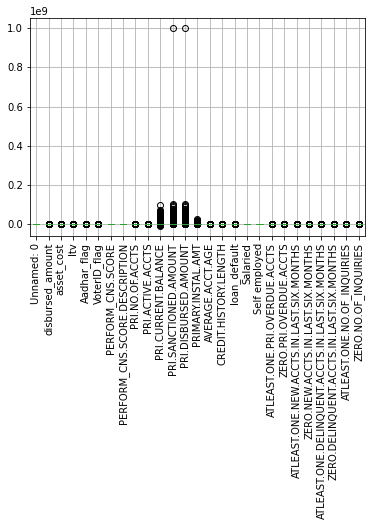

In [5]:
dfc_new.boxplot()
plt.xticks(rotation = 90)
plt.show()

In [6]:
dfc_new.drop('Unnamed: 0', axis = 1, inplace = True)

In [7]:
from sklearn.preprocessing import PowerTransformer

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x = dfc_new.drop('loan_default', axis = 1)
y = dfc_new['loan_default']

In [10]:
trainx, testx, trainy, testy = train_test_split(x,y, test_size = 0.3, random_state = 10, stratify = y)

In [11]:
print(trainx.shape)
print(testx.shape)

(163207, 25)
(69947, 25)


In [12]:
print(trainx.index)

Int64Index([154797, 185326, 215052,  13325,  66076, 119168, 201287, 160999,
            201410, 211542,
            ...
             90130, 100061,  61752, 143280, 179505,  25987,  97091, 160469,
             32660,  25551],
           dtype='int64', length=163207)


In [13]:
trainx.reset_index(drop = True, inplace = True)
testx.reset_index(drop = True, inplace = True)
trainy.reset_index(drop = True, inplace = True)
testy.reset_index(drop = True, inplace = True)

In [14]:
print(trainx.index)
print(testx.index)
print(trainy.index)
print(testy.index)

RangeIndex(start=0, stop=163207, step=1)
RangeIndex(start=0, stop=69947, step=1)
RangeIndex(start=0, stop=163207, step=1)
RangeIndex(start=0, stop=69947, step=1)


In [353]:
# apply Sequential feature selection

In [355]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [356]:
from sklearn.ensemble import RandomForestClassifier

In [357]:
rf = RandomForestClassifier()

In [362]:
sfs_fwd = sfs(estimator = rf, k_features = 20, scoring = 'recall', verbose = 2, forward = True)

In [363]:
fwd = sfs_fwd.fit(trainx, trainy)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.7min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 19.2min finished

[2021-10-22 02:30:56] Features: 1/20 -- score: 0.10003390147180591[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.1min remaining:    0.0s

STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

In [15]:
trainx.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'Aadhar_flag', 'VoterID_flag',
       'PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'Salaried', 'Self employed',
       'ATLEAST.ONE.PRI.OVERDUE.ACCTS', 'ZERO.PRI.OVERDUE.ACCTS',
       'ATLEAST.ONE.NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'ZERO.NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'ATLEAST.ONE.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'ZERO.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'ATLEAST.ONE.NO.OF_INQUIRIES', 'ZERO.NO.OF_INQUIRIES'],
      dtype='object')

In [16]:
train_cat = trainx[['Aadhar_flag', 'VoterID_flag','Salaried', 'Self employed','ATLEAST.ONE.PRI.OVERDUE.ACCTS', 'ZERO.PRI.OVERDUE.ACCTS',
       'ATLEAST.ONE.NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'ZERO.NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'ATLEAST.ONE.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'ZERO.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'ATLEAST.ONE.NO.OF_INQUIRIES', 'ZERO.NO.OF_INQUIRIES']]

In [17]:
train_num = trainx[['disbursed_amount', 'asset_cost', 'ltv', 'PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH']]

In [18]:
train_num.index

RangeIndex(start=0, stop=163207, step=1)

In [19]:
train_cat.index

RangeIndex(start=0, stop=163207, step=1)

In [20]:
pt = PowerTransformer()

In [21]:
scaled = pt.fit_transform(train_num)

C:\Users\Tusha\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [22]:
train_num = pd.DataFrame(scaled, columns = train_num.columns)
train_num.head()

,disbursed_amount,asset_cost,ltv,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
0,0.0,0.0,1.631676,0.664417,-0.979672,1.294787,1.566508,0.974860,1.386494,1.390040,1.534861,1.491849,1.569413
1,0.0,0.0,1.423378,-0.811049,0.971446,-0.929217,-0.815665,-0.177284,-0.823474,-0.822486,-0.678470,-0.894235,-0.890481
2,0.0,0.0,-0.168283,-0.811049,0.971446,-0.929217,-0.815665,-0.177284,-0.823474,-0.822486,-0.678470,-0.894235,-0.890481
3,0.0,0.0,-0.146445,1.333819,-0.582563,1.017100,0.803669,-0.160950,1.031563,1.036469,1.460724,0.265543,0.209034
4,0.0,0.0,-2.292066,1.333819,-0.796255,1.180368,1.253745,1.148136,1.412585,1.415198,1.564647,1.510670,1.539909


In [23]:
train_num.index

RangeIndex(start=0, stop=163207, step=1)

In [24]:
trainx = pd.concat((train_num, train_cat), axis = 1)
trainx.head(10)

,disbursed_amount,asset_cost,ltv,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,...,Salaried,Self employed,ATLEAST.ONE.PRI.OVERDUE.ACCTS,ZERO.PRI.OVERDUE.ACCTS,ATLEAST.ONE.NEW.ACCTS.IN.LAST.SIX.MONTHS,ZERO.NEW.ACCTS.IN.LAST.SIX.MONTHS,ATLEAST.ONE.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,ZERO.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,ATLEAST.ONE.NO.OF_INQUIRIES,ZERO.NO.OF_INQUIRIES
0,0.0,0.0,1.631676,0.664417,-0.979672,1.294787,1.566508,0.974860,1.386494,1.390040,...,1,0,1,0,0,1,1,0,0,1
1,0.0,0.0,1.423378,-0.811049,0.971446,-0.929217,-0.815665,-0.177284,-0.823474,-0.822486,...,1,0,0,1,0,1,0,1,0,1
2,0.0,0.0,-0.168283,-0.811049,0.971446,-0.929217,-0.815665,-0.177284,-0.823474,-0.822486,...,0,1,0,1,0,1,0,1,1,0
3,0.0,0.0,-0.146445,1.333819,-0.582563,1.017100,0.803669,-0.160950,1.031563,1.036469,...,0,1,0,1,1,0,0,1,0,1
4,0.0,0.0,-2.292066,1.333819,-0.796255,1.180368,1.253745,1.148136,1.412585,1.415198,...,1,0,0,1,0,1,0,1,0,1
5,0.0,0.0,1.352329,-0.811049,0.971446,-0.929217,-0.815665,-0.177284,-0.823474,-0.822486,...,1,0,0,1,0,1,0,1,0,1
6,0.0,0.0,-1.562383,1.539606,-0.663133,0.761636,0.803669,0.127979,1.277624,1.281254,...,0,1,0,1,0,1,0,1,0,1
7,0.0,0.0,-0.584891,-0.811049,0.971446,-0.929217,-0.815665,-0.177284,-0.823474,-0.822486,...,0,1,0,1,0,1,0,1,0,1
8,0.0,0.0,0.616164,-0.811049,0.971446,-0.929217,-0.815665,-0.177284,-0.823474,-0.822486,...,0,1,0,1,0,1,0,1,0,1
9,0.0,0.0,-1.262404,1.333819,-0.582563,0.761636,1.253745,-0.136658,1.114016,1.118568,...,0,1,0,1,0,1,0,1,0,1


In [25]:
trainx['asset_cost'].value_counts()

0.0    163207
Name: asset_cost, dtype: int64

In [26]:
trainx['disbursed_amount'].value_counts()

0.0    163207
Name: disbursed_amount, dtype: int64

In [27]:
trainx.index

RangeIndex(start=0, stop=163207, step=1)

In [28]:
trainx.shape

(163207, 25)

In [29]:
test_cat = testx[['Aadhar_flag', 'VoterID_flag','Salaried', 'Self employed','ATLEAST.ONE.PRI.OVERDUE.ACCTS', 'ZERO.PRI.OVERDUE.ACCTS',
       'ATLEAST.ONE.NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'ZERO.NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'ATLEAST.ONE.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'ZERO.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'ATLEAST.ONE.NO.OF_INQUIRIES', 'ZERO.NO.OF_INQUIRIES']]

test_num = testx[['disbursed_amount', 'asset_cost', 'ltv', 'PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH']]

In [30]:
testx.shape

(69947, 25)

In [31]:
test_num.index

RangeIndex(start=0, stop=69947, step=1)

In [32]:
test_cat.index

RangeIndex(start=0, stop=69947, step=1)

In [33]:
scaled2 = pt.transform(test_num)

test_num = pd.DataFrame(scaled2, columns = test_num.columns)
test_num.head()

,disbursed_amount,asset_cost,ltv,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
0,0.0,0.0,1.544814,-0.811049,0.971446,-0.929217,-0.815665,-0.177284,-0.823474,-0.822486,-0.678470,-0.894235,-0.890481
1,0.0,0.0,0.525950,0.664417,-1.391881,1.180368,1.455105,0.890437,1.390917,1.393711,1.450984,0.719926,0.598228
2,0.0,0.0,-0.207620,1.333819,-0.582563,0.761636,1.253745,0.399405,1.342787,1.345958,1.504134,1.596209,1.376708
3,0.0,0.0,-0.206643,1.458702,-0.919593,1.017100,1.455105,0.811496,1.386596,1.389426,1.514319,1.332735,1.498708
4,0.0,0.0,-1.731305,-0.811049,0.971446,-0.929217,-0.815665,-0.177284,-0.823474,-0.822486,-0.678470,-0.894235,-0.890481


In [34]:
test_num.index

RangeIndex(start=0, stop=69947, step=1)

In [35]:
testx = pd.concat((test_num, test_cat), axis = 1)
testx.head(10)

,disbursed_amount,asset_cost,ltv,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,...,Salaried,Self employed,ATLEAST.ONE.PRI.OVERDUE.ACCTS,ZERO.PRI.OVERDUE.ACCTS,ATLEAST.ONE.NEW.ACCTS.IN.LAST.SIX.MONTHS,ZERO.NEW.ACCTS.IN.LAST.SIX.MONTHS,ATLEAST.ONE.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,ZERO.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,ATLEAST.ONE.NO.OF_INQUIRIES,ZERO.NO.OF_INQUIRIES
0,0.0,0.0,1.544814,-0.811049,0.971446,-0.929217,-0.815665,-0.177284,-0.823474,-0.822486,...,1,0,0,1,0,1,0,1,0,1
1,0.0,0.0,0.525950,0.664417,-1.391881,1.180368,1.455105,0.890437,1.390917,1.393711,...,0,1,0,1,0,1,1,0,0,1
2,0.0,0.0,-0.207620,1.333819,-0.582563,0.761636,1.253745,0.399405,1.342787,1.345958,...,1,0,0,1,0,1,0,1,0,1
3,0.0,0.0,-0.206643,1.458702,-0.919593,1.017100,1.455105,0.811496,1.386596,1.389426,...,1,0,0,1,0,1,0,1,0,1
4,0.0,0.0,-1.731305,-0.811049,0.971446,-0.929217,-0.815665,-0.177284,-0.823474,-0.822486,...,0,1,0,1,0,1,0,1,0,1
5,0.0,0.0,-0.957908,1.539606,-0.663133,1.017100,1.253745,-0.173238,1.006747,1.009703,...,1,0,0,1,0,1,0,1,0,1
6,0.0,0.0,-0.363044,1.333819,-0.582563,0.761636,0.803669,-0.151376,1.032357,1.037260,...,1,0,0,1,1,0,0,1,0,1
7,0.0,0.0,-1.634098,-0.811049,0.971446,-0.929217,-0.815665,-0.177284,-0.823474,-0.822486,...,1,0,0,1,0,1,0,1,0,1
8,0.0,0.0,1.602085,1.333819,-0.796255,0.761636,0.803669,-0.155191,-0.823474,0.977209,...,0,1,0,1,1,0,0,1,0,1
9,0.0,0.0,0.004270,-0.811049,0.971446,-0.929217,-0.815665,-0.177284,-0.823474,-0.822486,...,1,0,0,1,0,1,0,1,0,1


In [36]:
testx.index

RangeIndex(start=0, stop=69947, step=1)

In [37]:
testx['asset_cost'].value_counts()

0.0    69947
Name: asset_cost, dtype: int64

In [38]:
testx['disbursed_amount'].value_counts()

0.0    69947
Name: disbursed_amount, dtype: int64

### Predicting without applying SMOTE

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth = 9)

In [45]:
pred_test = rf.fit(trainx, trainy).predict(testx)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
#test performance

In [43]:
print(classification_report(testy, pred_test)) #max_depth = 10

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54764
           1       0.60      0.00      0.00     15183

    accuracy                           0.78     69947
   macro avg       0.69      0.50      0.44     69947
weighted avg       0.74      0.78      0.69     69947



In [46]:
print(classification_report(testy, pred_test)) #max depth 9

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54764
           1       0.60      0.00      0.00     15183

    accuracy                           0.78     69947
   macro avg       0.69      0.50      0.44     69947
weighted avg       0.74      0.78      0.69     69947



In [47]:
imp = pd.Series(rf.feature_importances_, index = trainx.columns)
imp.sort_values(ascending = False)

ltv                                                0.244497
PERFORM_CNS.SCORE                                  0.098356
PRI.SANCTIONED.AMOUNT                              0.067919
PRI.DISBURSED.AMOUNT                               0.067556
CREDIT.HISTORY.LENGTH                              0.056852
PRI.CURRENT.BALANCE                                0.054267
PRIMARY.INSTAL.AMT                                 0.047364
AVERAGE.ACCT.AGE                                   0.045284
PRI.NO.OF.ACCTS                                    0.044927
PERFORM_CNS.SCORE.DESCRIPTION                      0.043962
ATLEAST.ONE.PRI.OVERDUE.ACCTS                      0.023628
ZERO.PRI.OVERDUE.ACCTS                             0.023453
ATLEAST.ONE.NO.OF_INQUIRIES                        0.023416
PRI.ACTIVE.ACCTS                                   0.023276
VoterID_flag                                       0.022046
Aadhar_flag                                        0.020367
ZERO.NO.OF_INQUIRIES                    

In [48]:
imp.sort_values(ascending = False).index

Index(['ltv', 'PERFORM_CNS.SCORE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'CREDIT.HISTORY.LENGTH', 'PRI.CURRENT.BALANCE',
       'PRIMARY.INSTAL.AMT', 'AVERAGE.ACCT.AGE', 'PRI.NO.OF.ACCTS',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'ATLEAST.ONE.PRI.OVERDUE.ACCTS',
       'ZERO.PRI.OVERDUE.ACCTS', 'ATLEAST.ONE.NO.OF_INQUIRIES',
       'PRI.ACTIVE.ACCTS', 'VoterID_flag', 'Aadhar_flag',
       'ZERO.NO.OF_INQUIRIES',
       'ATLEAST.ONE.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'ZERO.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'Self employed', 'Salaried',
       'ATLEAST.ONE.NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'ZERO.NEW.ACCTS.IN.LAST.SIX.MONTHS', 'asset_cost', 'disbursed_amount'],
      dtype='object')

In [49]:
pred_train = rf.fit(trainx, trainy).predict(trainx)

In [408]:
#train performance

In [50]:
print(classification_report(trainy, pred_train)) #max depth 9

              precision    recall  f1-score   support

           0       0.78      1.00      0.88    127779
           1       0.88      0.00      0.01     35428

    accuracy                           0.78    163207
   macro avg       0.83      0.50      0.44    163207
weighted avg       0.80      0.78      0.69    163207



In [49]:
trainx_imp = trainx[['ltv', 'PERFORM_CNS.SCORE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'PRI.CURRENT.BALANCE', 'CREDIT.HISTORY.LENGTH',
       'PRIMARY.INSTAL.AMT', 'AVERAGE.ACCT.AGE', 'PRI.NO.OF.ACCTS',
       'PERFORM_CNS.SCORE.DESCRIPTION']]
testx_imp = testx[['ltv', 'PERFORM_CNS.SCORE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'PRI.CURRENT.BALANCE', 'CREDIT.HISTORY.LENGTH',
       'PRIMARY.INSTAL.AMT', 'AVERAGE.ACCT.AGE', 'PRI.NO.OF.ACCTS',
       'PERFORM_CNS.SCORE.DESCRIPTION']]

In [43]:
rf = RandomForestClassifier(class_weight={0:.4, 1:.9}, max_depth = 9)

In [44]:
pred_test_imp_final = rf.fit(trainx_imp, trainy).predict(testx_imp)

In [54]:
print(classification_report(testy, pred_test_imp)) #0:.4, 1:.9

              precision    recall  f1-score   support

           0       0.79      0.89      0.83     54764
           1       0.26      0.15      0.19     15183

    accuracy                           0.73     69947
   macro avg       0.53      0.52      0.51     69947
weighted avg       0.68      0.73      0.69     69947



In [57]:
print(classification_report(testy, pred_test_imp)) #0:.4, 1:.8

              precision    recall  f1-score   support

           0       0.79      0.91      0.85     54764
           1       0.27      0.11      0.16     15183

    accuracy                           0.74     69947
   macro avg       0.53      0.51      0.50     69947
weighted avg       0.68      0.74      0.70     69947



In [60]:
print(classification_report(testy, pred_test_imp)) #0:.4, 1:.10

              precision    recall  f1-score   support

           0       0.79      0.98      0.87     54764
           1       0.32      0.03      0.05     15183

    accuracy                           0.78     69947
   macro avg       0.55      0.51      0.46     69947
weighted avg       0.68      0.78      0.70     69947



In [63]:
print(classification_report(testy, pred_test_imp)) #0:.4, 1:.10 max_depth = 9

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54764
           1       0.00      0.00      0.00     15183

    accuracy                           0.78     69947
   macro avg       0.39      0.50      0.44     69947
weighted avg       0.61      0.78      0.69     69947



C:\Users\Tusha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tusha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tusha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
print(classification_report(testy, pred_test_imp)) #0:.4, 1:.9 max_depth = 9

              precision    recall  f1-score   support

           0       0.79      0.97      0.87     54764
           1       0.39      0.07      0.12     15183

    accuracy                           0.77     69947
   macro avg       0.59      0.52      0.50     69947
weighted avg       0.70      0.77      0.71     69947



In [69]:
print(classification_report(testy, pred_test_imp)) #0:.4, 1:.8 max_depth = 9

              precision    recall  f1-score   support

           0       0.79      0.99      0.88     54764
           1       0.42      0.04      0.07     15183

    accuracy                           0.78     69947
   macro avg       0.61      0.51      0.47     69947
weighted avg       0.71      0.78      0.70     69947



In [72]:
print(classification_report(testy, pred_test_imp)) #0:.4, 1:.8 max_depth = 8

              precision    recall  f1-score   support

           0       0.79      0.99      0.88     54764
           1       0.43      0.03      0.06     15183

    accuracy                           0.78     69947
   macro avg       0.61      0.51      0.47     69947
weighted avg       0.71      0.78      0.70     69947



In [75]:
print(classification_report(testy, pred_test_imp)) #0:.4, 1:.8 max_depth = 7

              precision    recall  f1-score   support

           0       0.79      0.99      0.88     54764
           1       0.46      0.02      0.04     15183

    accuracy                           0.78     69947
   macro avg       0.62      0.51      0.46     69947
weighted avg       0.71      0.78      0.70     69947



In [78]:
print(classification_report(testy, pred_test_imp)) #0:.4, 1:.7 max_depth = 7

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54764
           1       0.48      0.00      0.01     15183

    accuracy                           0.78     69947
   macro avg       0.63      0.50      0.44     69947
weighted avg       0.72      0.78      0.69     69947



In [79]:
# we can see that optimal paramters of class_weight and max-depth is 0:.4, 1:.9 max_depth = 9

In [82]:
print(classification_report(testy, pred_test_imp))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87     54764
           1       0.39      0.07      0.12     15183

    accuracy                           0.77     69947
   macro avg       0.59      0.52      0.50     69947
weighted avg       0.70      0.77      0.71     69947



In [85]:
print(classification_report(testy, pred_test_imp)) #0:.4, 1:.9 max_depth = 9 min_samples_split = 3

              precision    recall  f1-score   support

           0       0.79      0.97      0.87     54764
           1       0.39      0.07      0.12     15183

    accuracy                           0.77     69947
   macro avg       0.59      0.52      0.50     69947
weighted avg       0.70      0.77      0.71     69947



In [88]:
print(classification_report(testy, pred_test_imp)) #0:.4, 1:.9 max_depth = 9 min_samples_split = 4

              precision    recall  f1-score   support

           0       0.79      0.97      0.87     54764
           1       0.39      0.07      0.12     15183

    accuracy                           0.77     69947
   macro avg       0.59      0.52      0.50     69947
weighted avg       0.70      0.77      0.71     69947



In [91]:
print(classification_report(testy, pred_test_imp)) #0:.4, 1:.9 max_depth = 9 min_samples_split = 10

              precision    recall  f1-score   support

           0       0.79      0.97      0.87     54764
           1       0.39      0.07      0.12     15183

    accuracy                           0.77     69947
   macro avg       0.59      0.52      0.49     69947
weighted avg       0.70      0.77      0.71     69947



In [94]:
print(classification_report(testy, pred_test_imp)) #0:.4, 1:.9 max_depth = 9 min_samples_split = 20

              precision    recall  f1-score   support

           0       0.79      0.97      0.87     54764
           1       0.39      0.07      0.12     15183

    accuracy                           0.77     69947
   macro avg       0.59      0.52      0.50     69947
weighted avg       0.70      0.77      0.71     69947



In [97]:
print(classification_report(testy, pred_test_imp)) #0:.4, 1:.9 max_depth = 9 min_samples_split = 20 max_leaf_nodes = 2

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54764
           1       0.00      0.00      0.00     15183

    accuracy                           0.78     69947
   macro avg       0.39      0.50      0.44     69947
weighted avg       0.61      0.78      0.69     69947



C:\Users\Tusha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tusha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tusha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
print(classification_report(testy, pred_test_imp)) #0:.4, 1:.9 max_depth = 9 min_samples_split = 20 max_leaf_nodes = 4

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54764
           1       0.00      0.00      0.00     15183

    accuracy                           0.78     69947
   macro avg       0.39      0.50      0.44     69947
weighted avg       0.61      0.78      0.69     69947



C:\Users\Tusha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tusha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tusha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
print(classification_report(testy, pred_test_imp)) #0:.4, 1:.9 max_depth = 9 min_samples_split = 20 max_leaf_nodes = 6

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54764
           1       0.00      0.00      0.00     15183

    accuracy                           0.78     69947
   macro avg       0.39      0.50      0.44     69947
weighted avg       0.61      0.78      0.69     69947



C:\Users\Tusha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tusha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tusha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
#best optimal paramters are:
# 0:.4, 1:.9 max_depth = 9

In [47]:
print(classification_report(testy, pred_test_imp_final))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87     54764
           1       0.38      0.07      0.12     15183

    accuracy                           0.77     69947
   macro avg       0.59      0.52      0.49     69947
weighted avg       0.70      0.77      0.71     69947



### After applying smote

In [40]:
from imblearn.over_sampling import SMOTE

In [50]:
sm = SMOTE()

train_x_sm, train_y_sm = sm.fit_resample(trainx_imp, trainy.astype('int'))

In [51]:
print(train_x_sm.shape)

(255558, 10)


In [52]:
train_y_sm.value_counts()

1    127779
0    127779
Name: loan_default, dtype: int64

In [53]:
train_x_sm.head()

,ltv,PERFORM_CNS.SCORE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRI.CURRENT.BALANCE,CREDIT.HISTORY.LENGTH,PRIMARY.INSTAL.AMT,AVERAGE.ACCT.AGE,PRI.NO.OF.ACCTS,PERFORM_CNS.SCORE.DESCRIPTION
0,1.631676,0.664417,1.386494,1.390040,0.974860,1.569413,1.534861,1.491849,1.294787,-0.979672
1,1.423378,-0.811049,-0.823474,-0.822486,-0.177284,-0.890481,-0.678470,-0.894235,-0.929217,0.971446
2,-0.168283,-0.811049,-0.823474,-0.822486,-0.177284,-0.890481,-0.678470,-0.894235,-0.929217,0.971446
3,-0.146445,1.333819,1.031563,1.036469,-0.160950,0.209034,1.460724,0.265543,1.017100,-0.582563
4,-2.292066,1.333819,1.412585,1.415198,1.148136,1.539909,1.564647,1.510670,1.180368,-0.796255


In [54]:
rf_sm = RandomForestClassifier(class_weight={0:.4, 1:.9})

In [55]:
pred_test_sm_final = rf_sm.fit(train_x_sm, train_y_sm).predict(testx_imp)

In [117]:
print(classification_report(testy, pred_test_sm)) # max depth: default

              precision    recall  f1-score   support

           0       0.81      0.61      0.70     54764
           1       0.26      0.50      0.34     15183

    accuracy                           0.58     69947
   macro avg       0.54      0.55      0.52     69947
weighted avg       0.69      0.58      0.62     69947



In [120]:
print(classification_report(testy, pred_test_sm)) #class_weight={0:.4, 1:.9} max depth 9

              precision    recall  f1-score   support

           0       0.90      0.12      0.21     54764
           1       0.23      0.95      0.37     15183

    accuracy                           0.30     69947
   macro avg       0.56      0.53      0.29     69947
weighted avg       0.75      0.30      0.25     69947



In [123]:
print(classification_report(testy, pred_test_sm)) #class_weight={0:.4, 1:.9} max depth 10

              precision    recall  f1-score   support

           0       0.89      0.14      0.24     54764
           1       0.23      0.94      0.37     15183

    accuracy                           0.31     69947
   macro avg       0.56      0.54      0.30     69947
weighted avg       0.75      0.31      0.27     69947



In [126]:
print(classification_report(testy, pred_test_sm)) #class_weight={0:.4, 1:.9} max depth 12

              precision    recall  f1-score   support

           0       0.88      0.17      0.29     54764
           1       0.24      0.92      0.37     15183

    accuracy                           0.33     69947
   macro avg       0.56      0.55      0.33     69947
weighted avg       0.74      0.33      0.31     69947



In [129]:
print(classification_report(testy, pred_test_sm)) #class_weight={0:.4, 1:.9} max depth 14

              precision    recall  f1-score   support

           0       0.87      0.21      0.34     54764
           1       0.24      0.89      0.38     15183

    accuracy                           0.36     69947
   macro avg       0.56      0.55      0.36     69947
weighted avg       0.74      0.36      0.35     69947



In [132]:
print(classification_report(testy, pred_test_sm)) #class_weight={0:.4, 1:.9} max depth 16

              precision    recall  f1-score   support

           0       0.86      0.25      0.39     54764
           1       0.24      0.85      0.38     15183

    accuracy                           0.38     69947
   macro avg       0.55      0.55      0.38     69947
weighted avg       0.73      0.38      0.39     69947



In [135]:
print(classification_report(testy, pred_test_sm)) #class_weight={0:.4, 1:.9} max depth 18

              precision    recall  f1-score   support

           0       0.85      0.29      0.44     54764
           1       0.24      0.82      0.37     15183

    accuracy                           0.41     69947
   macro avg       0.55      0.56      0.41     69947
weighted avg       0.72      0.41      0.42     69947



In [138]:
print(classification_report(testy, pred_test_sm)) #class_weight={0:.4, 1:.9} max depth 20

              precision    recall  f1-score   support

           0       0.85      0.34      0.48     54764
           1       0.25      0.78      0.37     15183

    accuracy                           0.43     69947
   macro avg       0.55      0.56      0.43     69947
weighted avg       0.72      0.43      0.46     69947



In [141]:
print(classification_report(testy, pred_test_sm)) #class_weight={0:.4, 1:.9} max depth 22

              precision    recall  f1-score   support

           0       0.84      0.38      0.52     54764
           1       0.25      0.74      0.37     15183

    accuracy                           0.46     69947
   macro avg       0.54      0.56      0.45     69947
weighted avg       0.71      0.46      0.49     69947



In [144]:
print(classification_report(testy, pred_test_sm)) #class_weight={0:.4, 1:.9} max depth 26

              precision    recall  f1-score   support

           0       0.83      0.44      0.57     54764
           1       0.25      0.68      0.36     15183

    accuracy                           0.49     69947
   macro avg       0.54      0.56      0.47     69947
weighted avg       0.70      0.49      0.53     69947



In [148]:
print(classification_report(testy, pred_test_sm)) #class_weight={0:.4, 1:.9} max depth 30

              precision    recall  f1-score   support

           0       0.82      0.48      0.60     54764
           1       0.25      0.62      0.36     15183

    accuracy                           0.51     69947
   macro avg       0.53      0.55      0.48     69947
weighted avg       0.70      0.51      0.55     69947



In [151]:
print(classification_report(testy, pred_test_sm)) #class_weight={0:.4, 1:.8} max depth 30

              precision    recall  f1-score   support

           0       0.82      0.49      0.62     54764
           1       0.25      0.61      0.35     15183

    accuracy                           0.52     69947
   macro avg       0.53      0.55      0.48     69947
weighted avg       0.70      0.52      0.56     69947



In [154]:
print(classification_report(testy, pred_test_sm)) #class_weight={0:.4, 1:.10} max depth 30

              precision    recall  f1-score   support

           0       0.79      0.93      0.86     54764
           1       0.31      0.11      0.16     15183

    accuracy                           0.75     69947
   macro avg       0.55      0.52      0.51     69947
weighted avg       0.69      0.75      0.71     69947



In [157]:
print(classification_report(testy, pred_test_sm)) #class_weight={0:.4, 1:.7} max depth 30

              precision    recall  f1-score   support

           0       0.82      0.53      0.64     54764
           1       0.26      0.59      0.36     15183

    accuracy                           0.54     69947
   macro avg       0.54      0.56      0.50     69947
weighted avg       0.70      0.54      0.58     69947



In [158]:
# best optimal paramters are: 
# class_weight={0:.4, 1:.9}

In [56]:
print(classification_report(testy, pred_test_sm_final)) # max depth: default

              precision    recall  f1-score   support

           0       0.81      0.61      0.70     54764
           1       0.26      0.50      0.34     15183

    accuracy                           0.58     69947
   macro avg       0.54      0.55      0.52     69947
weighted avg       0.69      0.58      0.62     69947



### XGBOOST

In [57]:
from xgboost import XGBClassifier

In [195]:
xg = XGBClassifier(n_estimators = 500,use_label_encoder=False, learning_rate = 0.8)

In [196]:
pred_xg_test = xg.fit(trainx, trainy).predict(testx)

[13:39:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [169]:
pd.Series(pred_xg_test).value_counts()

0    69549
1      398
dtype: int64

In [170]:
print(classification_report(testy, pred_xg_test)) #default params

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54764
           1       0.40      0.01      0.02     15183

    accuracy                           0.78     69947
   macro avg       0.59      0.50      0.45     69947
weighted avg       0.70      0.78      0.69     69947



In [176]:
print(classification_report(testy, pred_xg_test)) #n_est = 100

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54764
           1       0.40      0.01      0.02     15183

    accuracy                           0.78     69947
   macro avg       0.59      0.50      0.45     69947
weighted avg       0.70      0.78      0.69     69947



In [179]:
print(classification_report(testy, pred_xg_test)) #n_est = 125

              precision    recall  f1-score   support

           0       0.78      0.99      0.88     54764
           1       0.39      0.01      0.02     15183

    accuracy                           0.78     69947
   macro avg       0.59      0.50      0.45     69947
weighted avg       0.70      0.78      0.69     69947



In [182]:
print(classification_report(testy, pred_xg_test)) #n_est = 125, learning_rate = 0.6

              precision    recall  f1-score   support

           0       0.79      0.98      0.87     54764
           1       0.35      0.03      0.05     15183

    accuracy                           0.78     69947
   macro avg       0.57      0.51      0.46     69947
weighted avg       0.69      0.78      0.70     69947



In [185]:
print(classification_report(testy, pred_xg_test)) #n_est = 125, learning_rate = 0.8

              precision    recall  f1-score   support

           0       0.79      0.97      0.87     54764
           1       0.31      0.04      0.08     15183

    accuracy                           0.77     69947
   macro avg       0.55      0.51      0.47     69947
weighted avg       0.68      0.77      0.70     69947



In [188]:
print(classification_report(testy, pred_xg_test)) #n_est = 150, learning_rate = 0.8

              precision    recall  f1-score   support

           0       0.79      0.97      0.87     54764
           1       0.32      0.05      0.09     15183

    accuracy                           0.77     69947
   macro avg       0.55      0.51      0.48     69947
weighted avg       0.68      0.77      0.70     69947



In [191]:
print(classification_report(testy, pred_xg_test)) #n_est = 175, learning_rate = 0.8

              precision    recall  f1-score   support

           0       0.79      0.97      0.87     54764
           1       0.32      0.05      0.09     15183

    accuracy                           0.77     69947
   macro avg       0.55      0.51      0.48     69947
weighted avg       0.69      0.77      0.70     69947



In [194]:
print(classification_report(testy, pred_xg_test)) #n_est = 200, learning_rate = 0.8

              precision    recall  f1-score   support

           0       0.79      0.97      0.87     54764
           1       0.32      0.06      0.10     15183

    accuracy                           0.77     69947
   macro avg       0.55      0.51      0.48     69947
weighted avg       0.69      0.77      0.70     69947



In [197]:
print(classification_report(testy, pred_xg_test)) #n_est = 500, learning_rate = 0.8

              precision    recall  f1-score   support

           0       0.79      0.95      0.86     54764
           1       0.30      0.08      0.12     15183

    accuracy                           0.76     69947
   macro avg       0.55      0.51      0.49     69947
weighted avg       0.68      0.76      0.70     69947



In [198]:
#best optimal params
#n_est = 150, learning_rate = 0.8

In [200]:
imp_xg = pd.Series(xg.feature_importances_, index = trainx.columns)
imp_xg.sort_values(ascending = False)

PERFORM_CNS.SCORE                                  0.094083
VoterID_flag                                       0.065257
ATLEAST.ONE.NO.OF_INQUIRIES                        0.060600
ATLEAST.ONE.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    0.059918
Aadhar_flag                                        0.059137
ATLEAST.ONE.PRI.OVERDUE.ACCTS                      0.056354
PRI.SANCTIONED.AMOUNT                              0.052348
ltv                                                0.050466
PRI.DISBURSED.AMOUNT                               0.049401
PRI.CURRENT.BALANCE                                0.047192
ATLEAST.ONE.NEW.ACCTS.IN.LAST.SIX.MONTHS           0.046731
Salaried                                           0.046549
PRIMARY.INSTAL.AMT                                 0.046236
PRI.NO.OF.ACCTS                                    0.046227
CREDIT.HISTORY.LENGTH                              0.046060
Self employed                                      0.044712
PRI.ACTIVE.ACCTS                        

In [201]:
imp_xg.sort_values(ascending = False).index

Index(['PERFORM_CNS.SCORE', 'VoterID_flag', 'ATLEAST.ONE.NO.OF_INQUIRIES',
       'ATLEAST.ONE.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'Aadhar_flag',
       'ATLEAST.ONE.PRI.OVERDUE.ACCTS', 'PRI.SANCTIONED.AMOUNT', 'ltv',
       'PRI.DISBURSED.AMOUNT', 'PRI.CURRENT.BALANCE',
       'ATLEAST.ONE.NEW.ACCTS.IN.LAST.SIX.MONTHS', 'Salaried',
       'PRIMARY.INSTAL.AMT', 'PRI.NO.OF.ACCTS', 'CREDIT.HISTORY.LENGTH',
       'Self employed', 'PRI.ACTIVE.ACCTS', 'PERFORM_CNS.SCORE.DESCRIPTION',
       'AVERAGE.ACCT.AGE', 'asset_cost', 'ZERO.NO.OF_INQUIRIES',
       'ZERO.PRI.OVERDUE.ACCTS', 'ZERO.NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'ZERO.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'disbursed_amount'],
      dtype='object')

### After applying SMOTE

In [58]:
trainx_imp = trainx[['PERFORM_CNS.SCORE', 'VoterID_flag', 'ATLEAST.ONE.NO.OF_INQUIRIES',
       'ATLEAST.ONE.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'Aadhar_flag',
       'ATLEAST.ONE.PRI.OVERDUE.ACCTS', 'PRI.SANCTIONED.AMOUNT', 'ltv',
       'PRI.DISBURSED.AMOUNT', 'PRI.CURRENT.BALANCE',
       'ATLEAST.ONE.NEW.ACCTS.IN.LAST.SIX.MONTHS', 'Salaried',
       'PRIMARY.INSTAL.AMT', 'PRI.NO.OF.ACCTS', 'CREDIT.HISTORY.LENGTH',
       'Self employed', 'PRI.ACTIVE.ACCTS', 'PERFORM_CNS.SCORE.DESCRIPTION',
       'AVERAGE.ACCT.AGE']]
testx_imp = testx[['PERFORM_CNS.SCORE', 'VoterID_flag', 'ATLEAST.ONE.NO.OF_INQUIRIES',
       'ATLEAST.ONE.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'Aadhar_flag',
       'ATLEAST.ONE.PRI.OVERDUE.ACCTS', 'PRI.SANCTIONED.AMOUNT', 'ltv',
       'PRI.DISBURSED.AMOUNT', 'PRI.CURRENT.BALANCE',
       'ATLEAST.ONE.NEW.ACCTS.IN.LAST.SIX.MONTHS', 'Salaried',
       'PRIMARY.INSTAL.AMT', 'PRI.NO.OF.ACCTS', 'CREDIT.HISTORY.LENGTH',
       'Self employed', 'PRI.ACTIVE.ACCTS', 'PERFORM_CNS.SCORE.DESCRIPTION',
       'AVERAGE.ACCT.AGE']]

In [59]:
sm = SMOTE()

train1_x_sm, train1_y_sm = sm.fit_resample(trainx_imp, trainy.astype('int'))

In [60]:
xg = XGBClassifier(use_label_encoder= False)

pred_xg_test_sm = xg.fit(train1_x_sm, train1_y_sm).predict(testx_imp)

[19:58:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [205]:
print(classification_report(testy, pred_xg_test_sm)) #default

              precision    recall  f1-score   support

           0       0.81      0.69      0.75     54764
           1       0.28      0.43      0.34     15183

    accuracy                           0.63     69947
   macro avg       0.55      0.56      0.54     69947
weighted avg       0.70      0.63      0.66     69947



In [207]:
print(classification_report(testy, pred_xg_test_sm)) #default #n_est = 150, learning_rate = 0.8

              precision    recall  f1-score   support

           0       0.81      0.69      0.75     54764
           1       0.27      0.42      0.33     15183

    accuracy                           0.63     69947
   macro avg       0.54      0.56      0.54     69947
weighted avg       0.69      0.63      0.66     69947



In [209]:
print(classification_report(testy, pred_xg_test_sm)) #default #n_est = 150, learning_rate = 0.6

              precision    recall  f1-score   support

           0       0.81      0.71      0.76     54764
           1       0.28      0.41      0.33     15183

    accuracy                           0.64     69947
   macro avg       0.55      0.56      0.54     69947
weighted avg       0.70      0.64      0.67     69947



In [211]:
print(classification_report(testy, pred_xg_test_sm)) #default #n_est = 150, learning_rate = 0.4

              precision    recall  f1-score   support

           0       0.81      0.71      0.76     54764
           1       0.28      0.41      0.33     15183

    accuracy                           0.64     69947
   macro avg       0.55      0.56      0.54     69947
weighted avg       0.70      0.64      0.66     69947



In [213]:
print(classification_report(testy, pred_xg_test_sm)) #default #n_est = 250, learning_rate = 0.4

              precision    recall  f1-score   support

           0       0.81      0.71      0.76     54764
           1       0.28      0.40      0.33     15183

    accuracy                           0.64     69947
   macro avg       0.54      0.56      0.54     69947
weighted avg       0.70      0.64      0.66     69947



In [214]:
# optimal params: default

In [61]:
print(classification_report(testy, pred_xg_test_sm)) #default

              precision    recall  f1-score   support

           0       0.81      0.69      0.75     54764
           1       0.28      0.43      0.34     15183

    accuracy                           0.63     69947
   macro avg       0.55      0.56      0.54     69947
weighted avg       0.70      0.63      0.66     69947



### AdaBoost

In [217]:
from sklearn.ensemble import AdaBoostClassifier

In [242]:
ad = AdaBoostClassifier(n_estimators=1000, learning_rate = 2)

In [243]:
pred_ad_test = ad.fit(trainx, trainy).predict(testx)

In [220]:
print(classification_report(testy, pred_ad_test)) #default

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54764
           1       0.49      0.00      0.01     15183

    accuracy                           0.78     69947
   macro avg       0.64      0.50      0.44     69947
weighted avg       0.72      0.78      0.69     69947



In [223]:
print(classification_report(testy, pred_ad_test)) # n_est = 100

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54764
           1       0.45      0.00      0.01     15183

    accuracy                           0.78     69947
   macro avg       0.62      0.50      0.44     69947
weighted avg       0.71      0.78      0.69     69947



In [226]:
print(classification_report(testy, pred_ad_test)) # n_est = 200

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54764
           1       0.45      0.01      0.01     15183

    accuracy                           0.78     69947
   macro avg       0.61      0.50      0.44     69947
weighted avg       0.71      0.78      0.69     69947



In [229]:
print(classification_report(testy, pred_ad_test)) # n_est = 300

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54764
           1       0.44      0.01      0.01     15183

    accuracy                           0.78     69947
   macro avg       0.61      0.50      0.44     69947
weighted avg       0.71      0.78      0.69     69947



In [232]:
print(classification_report(testy, pred_ad_test)) # n_est = 500

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54764
           1       0.43      0.01      0.01     15183

    accuracy                           0.78     69947
   macro avg       0.61      0.50      0.44     69947
weighted avg       0.71      0.78      0.69     69947



In [237]:
print(classification_report(testy, pred_ad_test)) # n_est = 500 lr = 2

              precision    recall  f1-score   support

           0       0.83      0.53      0.65     54764
           1       0.26      0.60      0.37     15183

    accuracy                           0.55     69947
   macro avg       0.55      0.57      0.51     69947
weighted avg       0.70      0.55      0.59     69947



In [241]:
print(classification_report(testy, pred_ad_test)) # n_est = 500 lr = 1.5

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54764
           1       0.41      0.01      0.01     15183

    accuracy                           0.78     69947
   macro avg       0.60      0.50      0.45     69947
weighted avg       0.70      0.78      0.69     69947



In [244]:
print(classification_report(testy, pred_ad_test)) # n_est = 1000 lr = 2

              precision    recall  f1-score   support

           0       0.83      0.53      0.65     54764
           1       0.26      0.60      0.37     15183

    accuracy                           0.55     69947
   macro avg       0.55      0.57      0.51     69947
weighted avg       0.70      0.55      0.59     69947



In [245]:
# best params:
# n_est = 1000 lr = 2

In [246]:
imp_xg = pd.Series(ad.feature_importances_, index = trainx.columns)
imp_xg.sort_values(ascending = False)

PERFORM_CNS.SCORE                                  0.999
ltv                                                0.001
ZERO.NO.OF_INQUIRIES                               0.000
AVERAGE.ACCT.AGE                                   0.000
asset_cost                                         0.000
PERFORM_CNS.SCORE.DESCRIPTION                      0.000
PRI.NO.OF.ACCTS                                    0.000
PRI.ACTIVE.ACCTS                                   0.000
PRI.CURRENT.BALANCE                                0.000
PRI.SANCTIONED.AMOUNT                              0.000
PRI.DISBURSED.AMOUNT                               0.000
PRIMARY.INSTAL.AMT                                 0.000
CREDIT.HISTORY.LENGTH                              0.000
ATLEAST.ONE.NO.OF_INQUIRIES                        0.000
Aadhar_flag                                        0.000
VoterID_flag                                       0.000
Salaried                                           0.000
Self employed                  

In [248]:
pd.Series(pred_ad_test).value_counts()

0    35187
1    34760
dtype: int64

### Gradient Boosting

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

In [259]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate = 0.5)

In [260]:
pred_gb_test = gb.fit(trainx, trainy).predict(testx)

In [252]:
print(classification_report(testy, pred_gb_test))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54764
           1       0.53      0.00      0.01     15183

    accuracy                           0.78     69947
   macro avg       0.66      0.50      0.44     69947
weighted avg       0.73      0.78      0.69     69947



In [258]:
imp_gb = pd.Series(gb.feature_importances_, index = trainx.columns)
imp_gb.sort_values(ascending = False)

ltv                                                0.281327
PERFORM_CNS.SCORE                                  0.163639
PRI.SANCTIONED.AMOUNT                              0.081543
PRIMARY.INSTAL.AMT                                 0.053160
CREDIT.HISTORY.LENGTH                              0.053135
PRI.NO.OF.ACCTS                                    0.048277
PRI.CURRENT.BALANCE                                0.038690
Aadhar_flag                                        0.028201
ATLEAST.ONE.NO.OF_INQUIRIES                        0.026672
PRI.DISBURSED.AMOUNT                               0.026634
AVERAGE.ACCT.AGE                                   0.025257
Salaried                                           0.025124
PERFORM_CNS.SCORE.DESCRIPTION                      0.024668
ATLEAST.ONE.PRI.OVERDUE.ACCTS                      0.024450
ZERO.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS           0.020914
VoterID_flag                                       0.019883
ATLEAST.ONE.DELINQUENT.ACCTS.IN.LAST.SIX

In [256]:
print(classification_report(testy, pred_gb_test)) #learning_rate 0.5

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54764
           1       0.40      0.01      0.02     15183

    accuracy                           0.78     69947
   macro avg       0.59      0.50      0.45     69947
weighted avg       0.70      0.78      0.69     69947



In [261]:
print(classification_report(testy, pred_gb_test)) #learning_rate 0.5, n_est = 500

              precision    recall  f1-score   support

           0       0.78      0.99      0.87     54764
           1       0.32      0.02      0.04     15183

    accuracy                           0.78     69947
   macro avg       0.55      0.50      0.46     69947
weighted avg       0.68      0.78      0.69     69947



### After applying SMOTE

In [63]:
sm2 = SMOTE()

train2_x_sm, train2_y_sm = sm2.fit_resample(trainx, trainy.astype('int'))

In [64]:
train2_x_sm.shape

(255558, 25)

In [65]:
train2_y_sm.value_counts()

1    127779
0    127779
Name: loan_default, dtype: int64

In [66]:
gb = GradientBoostingClassifier()

In [67]:
pred_gb_test_sm = gb.fit(train2_x_sm, train2_y_sm).predict(testx)

In [268]:
#GB

In [267]:
print(classification_report(testy, pred_gb_test_sm)) #default

              precision    recall  f1-score   support

           0       0.83      0.62      0.71     54764
           1       0.28      0.53      0.37     15183

    accuracy                           0.60     69947
   macro avg       0.55      0.57      0.54     69947
weighted avg       0.71      0.60      0.63     69947



In [275]:
print(classification_report(testy, pred_gb_test_sm)) #n_est = 100

              precision    recall  f1-score   support

           0       0.83      0.62      0.71     54764
           1       0.28      0.53      0.37     15183

    accuracy                           0.60     69947
   macro avg       0.55      0.57      0.54     69947
weighted avg       0.71      0.60      0.63     69947



In [278]:
print(classification_report(testy, pred_gb_test_sm)) #n_est = 500

              precision    recall  f1-score   support

           0       0.82      0.67      0.74     54764
           1       0.28      0.45      0.34     15183

    accuracy                           0.63     69947
   macro avg       0.55      0.56      0.54     69947
weighted avg       0.70      0.63      0.65     69947



In [283]:
print(classification_report(testy, pred_gb_test_sm)) #n_est = 200 max_depth = 9

              precision    recall  f1-score   support

           0       0.81      0.69      0.75     54764
           1       0.28      0.43      0.34     15183

    accuracy                           0.63     69947
   macro avg       0.55      0.56      0.54     69947
weighted avg       0.70      0.63      0.66     69947



In [286]:
print(classification_report(testy, pred_gb_test_sm)) #n_est = 200 max_depth = 8

              precision    recall  f1-score   support

           0       0.81      0.69      0.75     54764
           1       0.28      0.43      0.34     15183

    accuracy                           0.63     69947
   macro avg       0.55      0.56      0.54     69947
weighted avg       0.70      0.63      0.66     69947



In [289]:
print(classification_report(testy, pred_gb_test_sm)) #n_est = 200 max_depth = 7

              precision    recall  f1-score   support

           0       0.81      0.70      0.75     54764
           1       0.28      0.43      0.34     15183

    accuracy                           0.64     69947
   macro avg       0.55      0.56      0.55     69947
weighted avg       0.70      0.64      0.66     69947



In [292]:
print(classification_report(testy, pred_gb_test_sm)) #n_est = 200 max_depth = 6

              precision    recall  f1-score   support

           0       0.82      0.68      0.74     54764
           1       0.28      0.45      0.34     15183

    accuracy                           0.63     69947
   macro avg       0.55      0.56      0.54     69947
weighted avg       0.70      0.63      0.66     69947



In [72]:
# best model as per recall
# default params
# GB

In [68]:
print(classification_report(testy, pred_gb_test_sm))

              precision    recall  f1-score   support

           0       0.83      0.61      0.70     54764
           1       0.28      0.54      0.37     15183

    accuracy                           0.59     69947
   macro avg       0.55      0.57      0.53     69947
weighted avg       0.71      0.59      0.63     69947



In [269]:
#XGb

In [69]:
print(classification_report(testy, pred_xg_test_sm))

              precision    recall  f1-score   support

           0       0.81      0.69      0.75     54764
           1       0.28      0.43      0.34     15183

    accuracy                           0.63     69947
   macro avg       0.55      0.56      0.54     69947
weighted avg       0.70      0.63      0.66     69947



In [271]:
#RF

In [71]:
print(classification_report(testy, pred_test_sm_final))

              precision    recall  f1-score   support

           0       0.81      0.61      0.70     54764
           1       0.26      0.50      0.34     15183

    accuracy                           0.58     69947
   macro avg       0.54      0.55      0.52     69947
weighted avg       0.69      0.58      0.62     69947



In [297]:
pd.Series([pred_test_sm_final,pred_xg_test_sm,pred_gb_test_sm], index = ['RF', 'XGB', 'GB'])

RF     [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, ...
XGB    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
GB     [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, ...
dtype: object

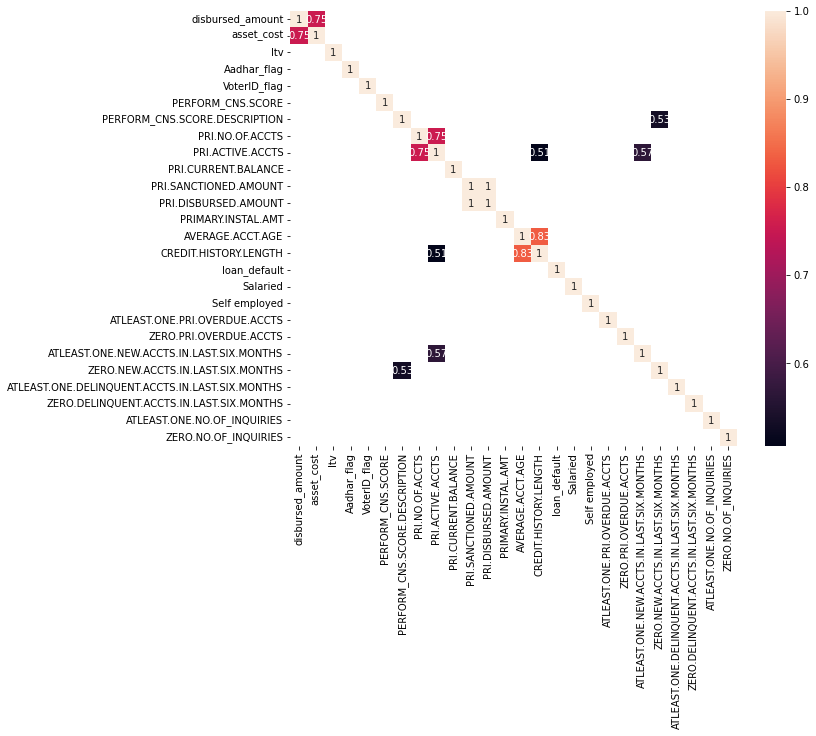

In [302]:
plt.figure(figsize = (10,8))
sns.heatmap(dfc_new.corr()[dfc_new.corr()>0.5], annot = True)
plt.show()

In [303]:
# SVM

In [304]:
from sklearn.svm import SVC

In [314]:
model = SVC()

In [ ]:
pred_svm = model.fit(trainx, trainy).predict(testx)

In [310]:
print(classification_report(testy, pred_svm)) #default

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54764
           1       0.53      0.00      0.01     15183

    accuracy                           0.78     69947
   macro avg       0.66      0.50      0.44     69947
weighted avg       0.73      0.78      0.69     69947



In [ ]:
print(classification_report(testy, pred_svm)) #class_weight={0:.4, 1:.9}

### Naive Bayes

In [74]:
from sklearn.naive_bayes import GaussianNB

In [97]:
nb = GaussianNB(var_smoothing=1e-10)

In [98]:
pred_nb = nb.fit(trainx, trainy).predict(testx)

In [93]:
print(classification_report(testy, pred_nb)) #default

              precision    recall  f1-score   support

           0       0.80      0.82      0.81     54764
           1       0.29      0.28      0.29     15183

    accuracy                           0.70     69947
   macro avg       0.55      0.55      0.55     69947
weighted avg       0.69      0.70      0.70     69947



In [96]:
print(classification_report(testy, pred_nb)) #var_smoothing=1e-08

              precision    recall  f1-score   support

           0       0.80      0.82      0.81     54764
           1       0.29      0.28      0.29     15183

    accuracy                           0.70     69947
   macro avg       0.55      0.55      0.55     69947
weighted avg       0.69      0.70      0.70     69947



In [99]:
print(classification_report(testy, pred_nb)) #var_smoothing=1e-10

              precision    recall  f1-score   support

           0       0.80      0.82      0.81     54764
           1       0.29      0.28      0.29     15183

    accuracy                           0.70     69947
   macro avg       0.55      0.55      0.55     69947
weighted avg       0.69      0.70      0.70     69947



In [90]:
imp_nb = pd.Series(nb.feature_importances_, index = trainx.columns)
imp_nb.sort_values(ascending = False)

AttributeError: 'GaussianNB' object has no attribute 'feature_importances_'

In [85]:
#After SMOT

In [100]:
sm3 = SMOTE()

train3_x_sm, train3_y_sm = sm3.fit_resample(trainx, trainy.astype('int'))

In [101]:
print(train3_x_sm.shape)

(255558, 25)


In [102]:
train3_y_sm.value_counts()

1    127779
0    127779
Name: loan_default, dtype: int64

In [113]:
nb = GaussianNB()

In [114]:
pred_nb_sm = nb.fit(train3_x_sm, train3_y_sm).predict(testx)

print(classification_report(testy, pred_nb_sm)) #default

              precision    recall  f1-score   support

           0       0.84      0.42      0.56     54764
           1       0.25      0.71      0.37     15183

    accuracy                           0.48     69947
   macro avg       0.55      0.57      0.47     69947
weighted avg       0.71      0.48      0.52     69947



In [110]:
pred_nb_sm = nb.fit(train3_x_sm, train3_y_sm).predict(testx)

In [108]:
print(classification_report(testy, pred_nb_sm)) #var_smoothing=1e-10

              precision    recall  f1-score   support

           0       0.84      0.42      0.56     54764
           1       0.25      0.71      0.37     15183

    accuracy                           0.48     69947
   macro avg       0.55      0.57      0.47     69947
weighted avg       0.71      0.48      0.52     69947



In [112]:
print(classification_report(testy, pred_nb_sm)) #var_smoothing=1e-20

              precision    recall  f1-score   support

           0       0.84      0.42      0.56     54764
           1       0.25      0.71      0.37     15183

    accuracy                           0.48     69947
   macro avg       0.55      0.57      0.47     69947
weighted avg       0.71      0.48      0.52     69947



### KNNClassifier

In [117]:
from sklearn.neighbors import KNeighborsClassifier

In [124]:
knn = KNeighborsClassifier(weights = 'distance', n_neighbors = 10)

In [125]:
pred_knn = knn.fit(trainx, trainy).predict(testx)

In [120]:
print(classification_report(testy, pred_knn)) #default

              precision    recall  f1-score   support

           0       0.79      0.91      0.85     54764
           1       0.28      0.12      0.17     15183

    accuracy                           0.74     69947
   macro avg       0.54      0.52      0.51     69947
weighted avg       0.68      0.74      0.70     69947



In [123]:
print(classification_report(testy, pred_knn)) #weights = 'distance'

              precision    recall  f1-score   support

           0       0.79      0.90      0.84     54764
           1       0.28      0.14      0.18     15183

    accuracy                           0.73     69947
   macro avg       0.53      0.52      0.51     69947
weighted avg       0.68      0.73      0.70     69947



In [126]:
print(classification_report(testy, pred_knn)) #weights = 'distance', n_neighbors = 10

              precision    recall  f1-score   support

           0       0.79      0.94      0.86     54764
           1       0.30      0.09      0.13     15183

    accuracy                           0.76     69947
   macro avg       0.54      0.51      0.50     69947
weighted avg       0.68      0.76      0.70     69947



In [129]:
knn.feature_importances_

AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

In [127]:
# distance is the optimal params

In [128]:
# after smote

In [130]:
knn = KNeighborsClassifier(weights = 'distance')

In [131]:
pred_knn_sm = knn.fit(train3_x_sm, train3_y_sm).predict(testx)

In [132]:
print(classification_report(testy, pred_knn_sm))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73     54764
           1       0.25      0.40      0.31     15183

    accuracy                           0.61     69947
   macro avg       0.53      0.53      0.52     69947
weighted avg       0.68      0.61      0.64     69947



### SGD Classifier

In [133]:
from sklearn.linear_model import SGDClassifier

In [161]:
sgd = SGDClassifier(penalty = 'l1', alpha = 0.05, l1_ratio = 1, class_weight={0:.4, 1:.7})

In [162]:
pred_sgd_sm = sgd.fit(train3_x_sm, train3_y_sm).predict(testx)

In [136]:
print(classification_report(testy, pred_sgd_sm)) #default

              precision    recall  f1-score   support

           0       0.83      0.55      0.66     54764
           1       0.27      0.60      0.37     15183

    accuracy                           0.56     69947
   macro avg       0.55      0.57      0.52     69947
weighted avg       0.71      0.56      0.60     69947



In [139]:
print(classification_report(testy, pred_sgd_sm)) #penalty = 'elasticnet', alpha = 0.001, l1_ratio = 1

              precision    recall  f1-score   support

           0       0.84      0.48      0.61     54764
           1       0.27      0.68      0.38     15183

    accuracy                           0.52     69947
   macro avg       0.55      0.58      0.50     69947
weighted avg       0.72      0.52      0.56     69947



In [142]:
print(classification_report(testy, pred_sgd_sm)) #penalty = 'elasticnet', alpha = 0.01, l1_ratio = 1

              precision    recall  f1-score   support

           0       0.83      0.51      0.63     54764
           1       0.26      0.63      0.37     15183

    accuracy                           0.54     69947
   macro avg       0.55      0.57      0.50     69947
weighted avg       0.71      0.54      0.58     69947



In [145]:
print(classification_report(testy, pred_sgd_sm)) ##penalty = 'elasticnet', alpha = 0.1, l1_ratio = 1

              precision    recall  f1-score   support

           0       0.86      0.05      0.10     54764
           1       0.22      0.97      0.36     15183

    accuracy                           0.25     69947
   macro avg       0.54      0.51      0.23     69947
weighted avg       0.72      0.25      0.16     69947



In [151]:
print(classification_report(testy, pred_sgd_sm)) #penalty = 'elasticnet', alpha = 0.03, l1_ratio = 1

              precision    recall  f1-score   support

           0       0.83      0.51      0.63     54764
           1       0.26      0.61      0.36     15183

    accuracy                           0.53     69947
   macro avg       0.54      0.56      0.50     69947
weighted avg       0.70      0.53      0.57     69947



In [154]:
print(classification_report(testy, pred_sgd_sm)) #penalty = 'elasticnet', alpha = 0.05, l1_ratio = 1

              precision    recall  f1-score   support

           0       0.83      0.49      0.62     54764
           1       0.25      0.62      0.36     15183

    accuracy                           0.52     69947
   macro avg       0.54      0.56      0.49     69947
weighted avg       0.70      0.52      0.56     69947



In [157]:
print(classification_report(testy, pred_sgd_sm)) #penalty = 'l1', alpha = 0.05, l1_ratio = 1

              precision    recall  f1-score   support

           0       0.83      0.49      0.62     54764
           1       0.25      0.62      0.36     15183

    accuracy                           0.52     69947
   macro avg       0.54      0.56      0.49     69947
weighted avg       0.70      0.52      0.56     69947



In [160]:
print(classification_report(testy, pred_sgd_sm)) #penalty = 'l1', alpha = 0.05, l1_ratio = 1, class_weight={0:.4, 1:.9}

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     54764
           1       0.22      1.00      0.36     15183

    accuracy                           0.22     69947
   macro avg       0.11      0.50      0.18     69947
weighted avg       0.05      0.22      0.08     69947



C:\Users\Tusha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tusha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tusha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [163]:
print(classification_report(testy, pred_sgd_sm))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     54764
           1       0.22      1.00      0.36     15183

    accuracy                           0.22     69947
   macro avg       0.11      0.50      0.18     69947
weighted avg       0.05      0.22      0.08     69947



C:\Users\Tusha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tusha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tusha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [164]:
# optimal params
# default

In [165]:
sgd = SGDClassifier()

pred_sgd_smf = sgd.fit(train3_x_sm, train3_y_sm).predict(testx)

print(classification_report(testy, pred_sgd_smf)) #default

              precision    recall  f1-score   support

           0       0.84      0.56      0.67     54764
           1       0.28      0.60      0.38     15183

    accuracy                           0.57     69947
   macro avg       0.56      0.58      0.52     69947
weighted avg       0.71      0.57      0.61     69947



### Logistic Regression

In [166]:
from sklearn.linear_model import LogisticRegression

In [173]:
lr = LogisticRegression(max_iter = 1000, penalty = 'l1', solver = 'saga', C = 0.2)

In [174]:
pred_lr_sm = lr.fit(train3_x_sm, train3_y_sm).predict(testx)

C:\Users\Tusha\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [169]:
print(classification_report(testy, pred_lr_sm)) #default

              precision    recall  f1-score   support

           0       0.83      0.58      0.68     54764
           1       0.28      0.58      0.37     15183

    accuracy                           0.58     69947
   macro avg       0.55      0.58      0.53     69947
weighted avg       0.71      0.58      0.61     69947



In [172]:
print(classification_report(testy, pred_lr_sm)) #max_iter = 1000, penalty = 'l1', solver = 'saga', C = 0.5

              precision    recall  f1-score   support

           0       0.83      0.57      0.68     54764
           1       0.28      0.59      0.38     15183

    accuracy                           0.58     69947
   macro avg       0.56      0.58      0.53     69947
weighted avg       0.71      0.58      0.61     69947



In [175]:
print(classification_report(testy, pred_lr_sm))

              precision    recall  f1-score   support

           0       0.83      0.57      0.68     54764
           1       0.28      0.59      0.38     15183

    accuracy                           0.58     69947
   macro avg       0.56      0.58      0.53     69947
weighted avg       0.71      0.58      0.61     69947



In [176]:
#optimal params: default

In [177]:
lr = LogisticRegression()

In [179]:
pred_lr_sm_f = lr.fit(train3_x_sm, train3_y_sm).predict(testx)


C:\Users\Tusha\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [180]:
print(classification_report(testy, pred_lr_sm_f)) #default

              precision    recall  f1-score   support

           0       0.83      0.58      0.68     54764
           1       0.28      0.58      0.37     15183

    accuracy                           0.58     69947
   macro avg       0.55      0.58      0.53     69947
weighted avg       0.71      0.58      0.61     69947



### Final Ensemble model

In [181]:
print(classification_report(testy, pred_xg_test_sm)) #XGB

              precision    recall  f1-score   support

           0       0.81      0.69      0.75     54764
           1       0.28      0.43      0.34     15183

    accuracy                           0.63     69947
   macro avg       0.55      0.56      0.54     69947
weighted avg       0.70      0.63      0.66     69947



In [182]:
print(classification_report(testy, pred_test_sm_final)) #RF

              precision    recall  f1-score   support

           0       0.81      0.61      0.70     54764
           1       0.26      0.50      0.34     15183

    accuracy                           0.58     69947
   macro avg       0.54      0.55      0.52     69947
weighted avg       0.69      0.58      0.62     69947



In [183]:
print(classification_report(testy, pred_gb_test_sm)) #GB

              precision    recall  f1-score   support

           0       0.83      0.61      0.70     54764
           1       0.28      0.54      0.37     15183

    accuracy                           0.59     69947
   macro avg       0.55      0.57      0.53     69947
weighted avg       0.71      0.59      0.63     69947



In [184]:
print(classification_report(testy, pred_nb_sm)) #NB

              precision    recall  f1-score   support

           0       0.84      0.42      0.56     54764
           1       0.25      0.71      0.37     15183

    accuracy                           0.48     69947
   macro avg       0.55      0.57      0.47     69947
weighted avg       0.71      0.48      0.52     69947



In [185]:
print(classification_report(testy, pred_sgd_smf)) #SGD

              precision    recall  f1-score   support

           0       0.84      0.56      0.67     54764
           1       0.28      0.60      0.38     15183

    accuracy                           0.57     69947
   macro avg       0.56      0.58      0.52     69947
weighted avg       0.71      0.57      0.61     69947



In [186]:
print(classification_report(testy, pred_lr_sm_f)) # LR

              precision    recall  f1-score   support

           0       0.83      0.58      0.68     54764
           1       0.28      0.58      0.37     15183

    accuracy                           0.58     69947
   macro avg       0.55      0.58      0.53     69947
weighted avg       0.71      0.58      0.61     69947



In [187]:
final_df = pd.DataFrame({'XGB': pred_xg_test_sm, 'RF': pred_test_sm_final, 'GB':pred_gb_test_sm, 'NB':pred_nb_sm, 'SGD':pred_sgd_smf})

In [189]:
final_df.head(20)

,XGB,RF,GB,NB,SGD
0,1,1,1,1,1
1,0,0,0,1,1
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,1,0
5,0,0,0,0,0
6,0,0,0,0,0
7,0,0,0,0,0
8,0,0,0,0,1
9,0,1,1,1,0


In [208]:
final_df.iloc[1]

XGB    0
RF     0
GB     0
NB     1
SGD    1
Name: 1, dtype: int32

In [209]:
final_df.iloc[1].mode()[0]

0

In [201]:
final_df.shape[0]

69947

In [194]:
testy.shape

(69947,)

In [210]:
final = []
for i in range(final_df.shape[0]):
    final.append(final_df.iloc[i].mode()[0])

In [211]:
final

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,


In [213]:
final_pred = pd.Series(final)
final_pred

0        1
1        0
2        0
3        0
4        0
        ..
69942    1
69943    1
69944    1
69945    0
69946    0
Length: 69947, dtype: int64

In [214]:
print(classification_report(testy, final_pred))

              precision    recall  f1-score   support

           0       0.83      0.61      0.70     54764
           1       0.28      0.54      0.37     15183

    accuracy                           0.59     69947
   macro avg       0.55      0.58      0.53     69947
weighted avg       0.71      0.59      0.63     69947



In [266]:
final_df.to_csv('final_df.csv')

In [267]:
train3_x_sm.to_csv('train3_x_sm.csv')
train3_y_sm.to_csv('train3_y_sm.csv')
testx.to_csv('testx.csv')
testy.to_csv('testy.csv')

In [216]:
#Perform more feature engineering

In [215]:
dfc_new.head()

,disbursed_amount,asset_cost,ltv,Aadhar_flag,VoterID_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.CURRENT.BALANCE,...,Salaried,Self employed,ATLEAST.ONE.PRI.OVERDUE.ACCTS,ZERO.PRI.OVERDUE.ACCTS,ATLEAST.ONE.NEW.ACCTS.IN.LAST.SIX.MONTHS,ZERO.NEW.ACCTS.IN.LAST.SIX.MONTHS,ATLEAST.ONE.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,ZERO.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,ATLEAST.ONE.NO.OF_INQUIRIES,ZERO.NO.OF_INQUIRIES
0,50578,58400,89.55,1,0,0,116950,0,0,0,...,1,0,0,1,0,1,0,1,0,1
1,47145,65550,73.23,1,0,1,5557,1,1,27600,...,0,1,1,0,0,1,1,0,0,1
2,53278,61360,89.63,1,0,0,116950,0,0,0,...,0,1,0,1,0,1,0,1,0,1
3,57513,66113,88.48,1,0,1,1134,3,0,0,...,0,1,0,1,0,1,0,1,1,0
4,52378,60300,88.39,1,0,0,116950,0,0,0,...,0,1,0,1,0,1,0,1,1,0


In [217]:
dfc_new.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'Aadhar_flag', 'VoterID_flag',
       'PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'loan_default', 'Salaried', 'Self employed',
       'ATLEAST.ONE.PRI.OVERDUE.ACCTS', 'ZERO.PRI.OVERDUE.ACCTS',
       'ATLEAST.ONE.NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'ZERO.NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'ATLEAST.ONE.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'ZERO.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'ATLEAST.ONE.NO.OF_INQUIRIES', 'ZERO.NO.OF_INQUIRIES'],
      dtype='object')

In [227]:
round(dfc_new.groupby('loan_default')['disbursed_amount'].mean(),2)

loan_default
0    53826.47
1    56270.47
Name: disbursed_amount, dtype: float64

In [229]:
a = dfc_new[dfc_new['loan_default'] == 0].index
a = list(a)


In [230]:
b = dfc_new[dfc_new['loan_default'] == 1].index
b = list(b)


In [231]:
dfc_new['Mean_Disbursed_Amount_wrt_loan_status'] = round(dfc_new.groupby('loan_default')['disbursed_amount'].mean(),2)[0]

In [232]:
dfc_new['Mean_Disbursed_Amount_wrt_loan_status'].iloc[b] = round(dfc_new.groupby('loan_default')['disbursed_amount'].mean(),2)[1]

C:\Users\Tusha\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [233]:
dfc_new['Mean_Disbursed_Amount_wrt_loan_status'].value_counts()

53826.47    182543
56270.47     50611
Name: Mean_Disbursed_Amount_wrt_loan_status, dtype: int64

In [234]:
dfc_new['loan_default'].value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

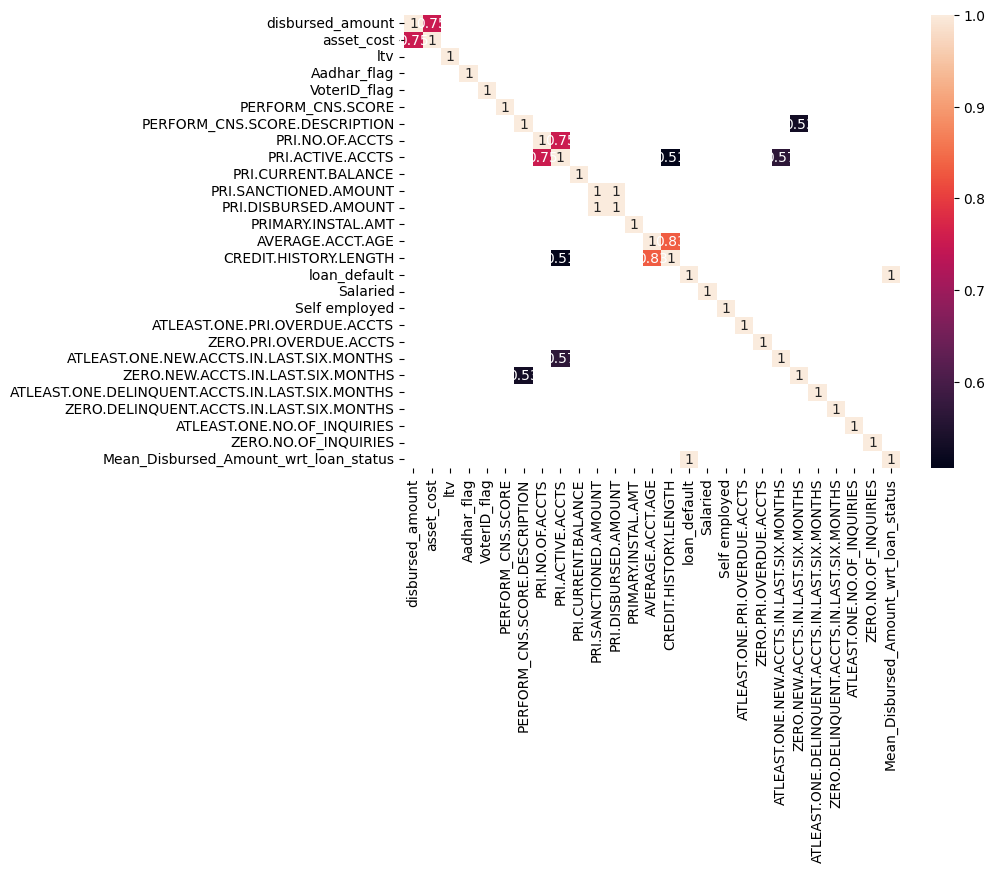

In [238]:
plt.figure(figsize = (8,6),dpi = 100)
sns.heatmap(dfc_new.corr()[dfc_new.corr() >0.5], annot = True)
plt.show()

In [239]:
dfc_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 27 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   disbursed_amount                                 233154 non-null  int64  
 1   asset_cost                                       233154 non-null  int64  
 2   ltv                                              233154 non-null  float64
 3   Aadhar_flag                                      233154 non-null  int64  
 4   VoterID_flag                                     233154 non-null  int64  
 5   PERFORM_CNS.SCORE                                233154 non-null  int64  
 6   PERFORM_CNS.SCORE.DESCRIPTION                    233154 non-null  int64  
 7   PRI.NO.OF.ACCTS                                  233154 non-null  int64  
 8   PRI.ACTIVE.ACCTS                                 233154 non-null  int64  
 9   PRI.CURRENT.BAL

In [246]:
x = dfc_new.drop('loan_default', axis = 1)
y = dfc_new['loan_default']

In [247]:
trainx, testx, trainy, testy = train_test_split(x,y, test_size = 0.30, random_state = 10)

In [248]:
rf = RandomForestClassifier()

In [251]:
pred_test = rf.fit(trainx, trainy).predict(testx)

In [252]:
print(classification_report(testy, pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     54757
           1       1.00      1.00      1.00     15190

    accuracy                           1.00     69947
   macro avg       1.00      1.00      1.00     69947
weighted avg       1.00      1.00      1.00     69947



In [249]:
testx.shape

(69947, 26)

In [250]:
trainx.shape

(163207, 26)

In [254]:
dfc_new2 = dfc_new.copy()

In [255]:
dfc_new2.drop('Mean_Disbursed_Amount_wrt_loan_status', axis = 1, inplace = True)

In [256]:
dfc_new2.shape

(233154, 26)

In [257]:
dfc_new.shape

(233154, 27)

In [258]:
dfc_new2.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'Aadhar_flag', 'VoterID_flag',
       'PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'loan_default', 'Salaried', 'Self employed',
       'ATLEAST.ONE.PRI.OVERDUE.ACCTS', 'ZERO.PRI.OVERDUE.ACCTS',
       'ATLEAST.ONE.NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'ZERO.NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'ATLEAST.ONE.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'ZERO.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'ATLEAST.ONE.NO.OF_INQUIRIES', 'ZERO.NO.OF_INQUIRIES'],
      dtype='object')

In [261]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [262]:
features = dfc_new2.drop('loan_default', axis = 1)
y = dfc_new2['loan_default']

In [265]:
err = []
score = []

for i in range(2,10):
    km = KMeans(n_clusters = i)
    km.fit(features)
    err.append(km.inertia_)
    score.append(silhouette_score(features, km.labels_))
    

KeyboardInterrupt: 